<a href="https://colab.research.google.com/github/teoad95/Infusing-business-optimization-processes-with-machine-learning-and-expert-knowledge./blob/main/Main_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression experiments

## Experiments with dataset with statistical values for the whole jumbo

Dataset describes the orders of each run using statistical values like:

1.   Number of orders
2.   Number of Distinct widths (orders)
3.   Maximum width of run
4.   Minimum width of run
5.   Average width of orders
6.   Number of reels requested from each order (Average bettween the actual and the upper/over tolerances)
7.   Total waste percentage of solution



###Data visualization and preprocessing


Import pre-required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_style('darkgrid')
cmap = sns.cm.mako_r
%matplotlib inline

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

Load dataset

In [3]:
dataset_url = 'https://raw.githubusercontent.com/teoad95/Infusing-business-optimization-processes-with-machine-learning-and-expert-knowledge./main/Datasets/StatisticalDataset.csv'

In [4]:
runs = pd.read_csv(dataset_url, sep=';')

Describe data

In [5]:
runs.head()

Run number  Max width  ...  Weighted average width  Total waste percentage
0         702       4900  ...             2709.066292                2.303394
1         704       4900  ...             2574.588114                0.086580
2         706       4900  ...             3314.418176               13.841169
3         713       4100  ...             2974.281246                3.244852
4         715       4400  ...             2674.563460                2.160682

[5 rows x 9 columns]

In [6]:
runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Run number               350 non-null    int64  
 1   Max width                350 non-null    int64  
 2   Min width                350 non-null    int64  
 3   Number of orders         350 non-null    int64  
 4   Average reel width       350 non-null    float64
 5   Deviation of widths      350 non-null    float64
 6   Number of ordered reels  350 non-null    float64
 7   Weighted average width   350 non-null    float64
 8   Total waste percentage   350 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 24.7 KB


In [7]:
runs.drop(columns=['Run number']).describe()

Max width    Min width  ...  Weighted average width  Total waste percentage
count   350.000000   350.000000  ...              350.000000              350.000000
mean   4784.285714   685.142857  ...             2616.490235                1.726614
std     296.510612   302.722806  ...              510.074808                2.622997
min    3500.000000   500.000000  ...             1197.284257                0.000000
25%    4700.000000   500.000000  ...             2259.961976                0.316456
50%    4900.000000   600.000000  ...             2664.115687                0.940091
75%    5000.000000   700.000000  ...             2960.876574                1.632503
max    5000.000000  2000.000000  ...             3933.297689               23.419755

[8 rows x 8 columns]

In [8]:
runs = runs.fillna(0)

In [9]:
plt.figure(figsize=(8,8))

plt.title('Solution total waste percent ditribution')
sns.distplot(runs['Total waste percentage'])

In [10]:
ax = sns.pairplot(runs[runs.columns])

In [11]:
def plot_corr_matrix(datast):
    corrMatrix = datast.corr()
    plt.figure(figsize=(35,15))
    sns.heatmap(corrMatrix, annot=True)
    plt.show()
    

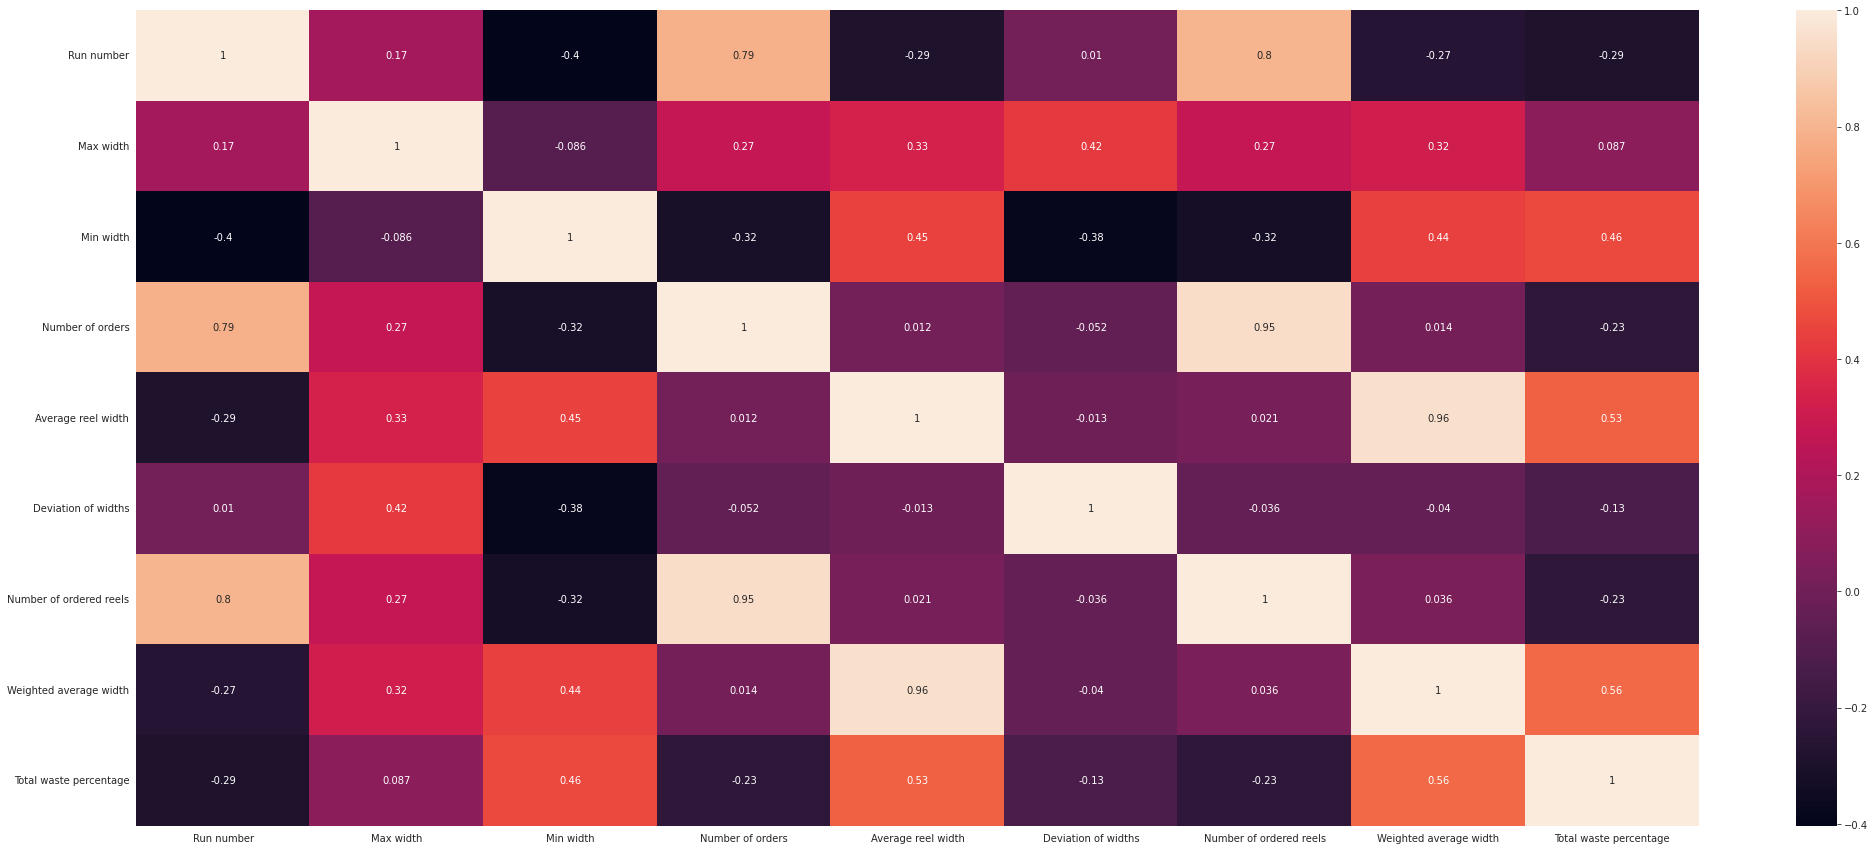

In [12]:
plot_corr_matrix(runs)

We see that average number of reels is highly correlated with number of orders.

### Regression experiments

In [13]:
# Splitting into features and value to be predicted
X = runs.drop(columns=['Run number', 'Total waste percentage', 'Number of orders'])
y = runs['Total waste percentage']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [15]:
from sklearn import metrics
def regression_model_metrics(y_test, y_pred):
  return metrics.mean_absolute_error(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred), np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [16]:
def get_model_prediction_time(model, x_to_test):
  start = datetime.now()
  prd = model.predict(x_to_test)
  end = datetime.now()
  time_difference = (end-start).total_seconds()
  return time_difference/len(x_to_test)

In [17]:
def test_regression_model(model, l_x_train, l_x_test, l_y_train, l_y_test):
  model.fit(l_x_train, l_y_train)
  prediction_time = get_model_prediction_time(model, l_x_test)
  mean_absolute_error, mean_squared_error, root_mean_square_error = regression_model_metrics(l_y_test, model.predict(l_x_test))
  return mean_absolute_error, mean_squared_error, root_mean_square_error, prediction_time

In [281]:
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet, BayesianRidge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor
from sklearn.preprocessing import PolynomialFeatures

def test_regression_models(l_x_train, l_x_test, l_y_train, l_y_test):
  names_list = []
  mean_absolute_error_list = []
  mean_square_error_list = []
  root_mean_square_error_list = []
  prediction_time_list = []

  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(LinearRegression(), l_x_train, l_x_test, l_y_train, l_y_test)
  names_list.append('Linear regression')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)


  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(SGDRegressor(), l_x_train, l_x_test, l_y_train, l_y_test)
  names_list.append('SGD regressor')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)
  
  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(ElasticNet(), l_x_train, l_x_test, l_y_train, l_y_test)
  names_list.append('ElasticNet')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)

  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(BayesianRidge(), l_x_train, l_x_test, l_y_train, l_y_test)
  names_list.append('BayesianRidge')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)

  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(RandomForestRegressor(), l_x_train, l_x_test, l_y_train, l_y_test)
  names_list.append('RandomForestRegressor')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)

  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(DecisionTreeRegressor(), l_x_train, l_x_test, l_y_train, l_y_test)
  names_list.append('DecisionTreeRegressor')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)

  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(XGBRFRegressor(), l_x_train, l_x_test, l_y_train, l_y_test)
  names_list.append('XGBRFRegressor')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)

  poly_reg = PolynomialFeatures(degree=2)
  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(LinearRegression(), poly_reg.fit_transform(l_x_train), poly_reg.transform(l_x_test), l_y_train, l_y_test)
  names_list.append('Polynomial regression 2nd degree')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)
  
  poly_reg = PolynomialFeatures(degree=3)
  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(LinearRegression(), poly_reg.fit_transform(l_x_train), poly_reg.transform(l_x_test), l_y_train, l_y_test)
  names_list.append('Polynomial regression 3nd degree')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)

  # initialize data of lists.
  data = {'Model name':names_list,
          'Mean absolute error':mean_absolute_error_list,
          'Mean square error':mean_square_error_list,
          'Root mean square error':root_mean_square_error_list,
          'Prediction time (s)': prediction_time_list
          }
  return pd.DataFrame.from_dict(data).sort_values(by=['Mean absolute error'])


In [19]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[07:58:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [20]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000457
6                    XGBRFRegressor  ...             0.000019
7  Polynomial regression 2nd degree  ...             0.000002
5             DecisionTreeRegressor  ...             0.000036
8  Polynomial regression 3nd degree  ...             0.000003
3                     BayesianRidge  ...             0.000359
0                 Linear regression  ...             0.000040
2                        ElasticNet  ...             0.000033
1                     SGD regressor  ...             0.000031

[9 rows x 5 columns]

## Experiments with dataset with statistical values for the every jumbo n/10 of the input

Dataset describes the orders of each run using statistical values like:

1.   Number of orders
2.   Number of Distinct widths (orders)
3.   Maximum width of run
4.   Minimum width of run
5.   Average width of orders
6.   Number of reels requested from each order (Average bettween the actual and the upper/over tolerances)
7.   Total waste percentage of solution

###Data visualization and preprocessing


In [30]:
extended_dataset_url = 'https://raw.githubusercontent.com/teoad95/Infusing-business-optimization-processes-with-machine-learning-and-expert-knowledge./main/Datasets/ExtendedStatisticalDataset.csv'

In [31]:
extended_runs = pd.read_csv(extended_dataset_url, sep=';')

In [32]:
extended_runs.head()

Run number  Max width  ...  Max width 10  Total waste percentage
0         701       4300  ...           NaN                1.253918
1         702       4900  ...           NaN                2.303394
2         703       4600  ...           NaN                0.751089
3         704       4900  ...           NaN                0.086580
4         705       5000  ...           NaN                6.347962

[5 rows x 77 columns]

In [33]:
extended_runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 77 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Run number                  350 non-null    int64  
 1   Max width                   350 non-null    int64  
 2   Min width                   350 non-null    int64  
 3   Number of orders            350 non-null    int64  
 4   Average reel width          350 non-null    float64
 5   Deviation of widths         350 non-null    float64
 6   Number of orders 1          350 non-null    int64  
 7   Number of orders 2          350 non-null    int64  
 8   Number of orders 3          350 non-null    int64  
 9   Number of orders 4          350 non-null    int64  
 10  Number of orders 5          350 non-null    int64  
 11  Number of orders 6          350 non-null    int64  
 12  Number of orders 7          350 non-null    int64  
 13  Number of orders 8          350 non

In [34]:
extended_runs.drop(columns=['Run number']).describe()

Max width    Min width  ...  Max width 10  Total waste percentage
count   350.000000   350.000000  ...           0.0              350.000000
mean   4782.857143   685.428571  ...           NaN                1.726614
std     296.382888   302.594728  ...           NaN                2.622997
min    3500.000000   500.000000  ...           NaN                0.000000
25%    4700.000000   500.000000  ...           NaN                0.316456
50%    4900.000000   600.000000  ...           NaN                0.940091
75%    5000.000000   700.000000  ...           NaN                1.632503
max    5000.000000  2000.000000  ...           NaN               23.419755

[8 rows x 76 columns]

In [35]:
extended_runs = extended_runs.fillna(0)

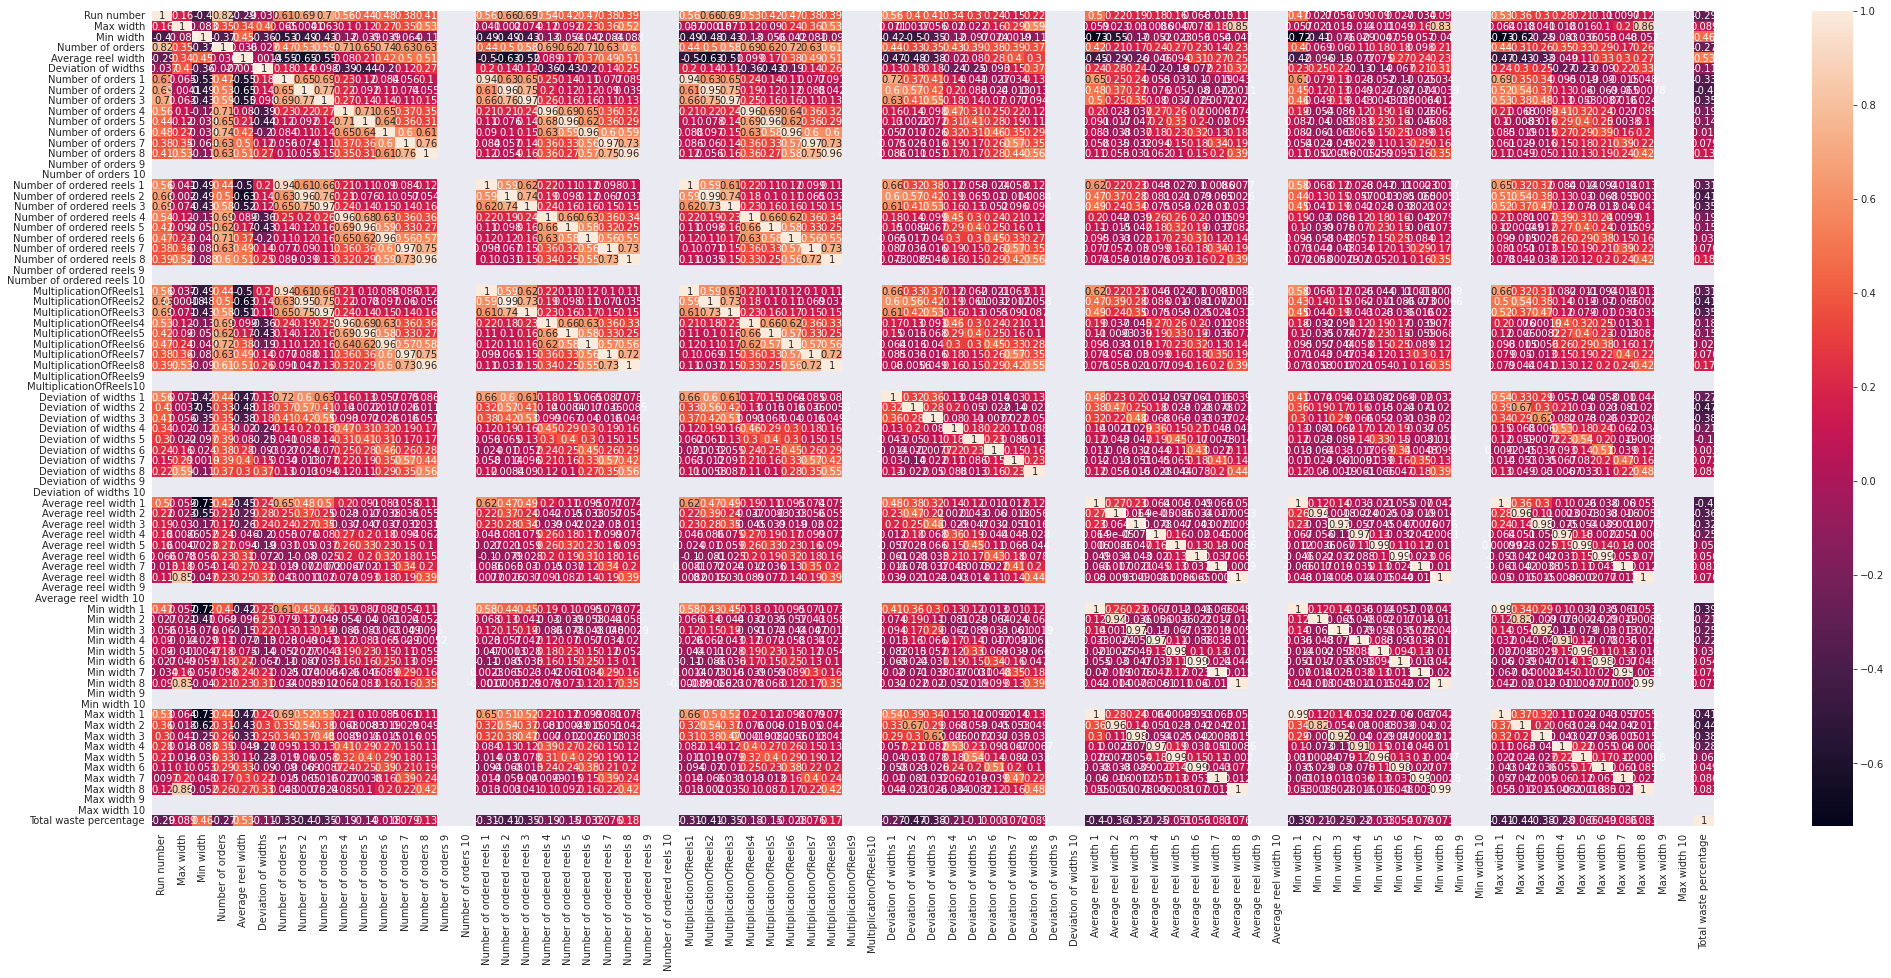

In [36]:
plot_corr_matrix(extended_runs)

### Regression experiments

In [37]:
# Splitting into features and value to be predicted
X = extended_runs.drop(columns=['Run number', 'Total waste percentage'])
y = extended_runs['Total waste percentage']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [39]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[08:06:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [40]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000471
6                    XGBRFRegressor  ...             0.000048
5             DecisionTreeRegressor  ...             0.000045
0                 Linear regression  ...             0.000055
2                        ElasticNet  ...             0.000235
3                     BayesianRidge  ...             0.000143
7  Polynomial regression 2nd degree  ...             0.000009
8  Polynomial regression 3nd degree  ...             0.000403
1                     SGD regressor  ...             0.000192

[9 rows x 5 columns]

# Classification experiments

Define classes method

In [42]:
def classification_condition(row):
  total_waste_value = row['Total waste percentage']
  if total_waste_value < 1:
    return 0
  if total_waste_value < 2:
    return 1
  return 2

## Classification experiments with dataset with statistical values for the whole jumbo

In [43]:
runs['Class'] = runs.apply (lambda row: classification_condition(row), axis=1)

### Experiments with original data

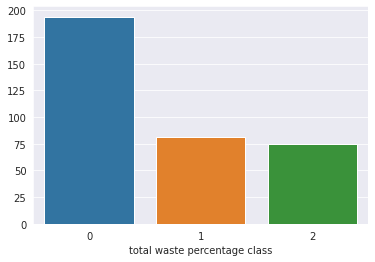

In [44]:
# Checking if Data is balanced
xs = runs['Class'].value_counts().index
ys = runs['Class'].value_counts().values

ax = sns.barplot(xs, ys)
ax.set_xlabel("total waste percentage class")
plt.show()

Define methods:

*   Print metrics
*   Test model



In [45]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

def print_metrics(actual, prediction, model, x_test, y_test):
  print(f"Accuracy Score : {round(accuracy_score(actual, prediction) * 100, 2)}%")
  print(classification_report(actual, prediction))
  plot_confusion_matrix(model, x_test, y_test, cmap=cmap)
  plt.grid(False)
  plt.show()

In [46]:
def test_model(model, xtrain, ytrain, xtest, ytest):
  model.fit(xtrain, ytrain)
  preds = model.predict(xtest)
  print_metrics(ytest, preds, model, xtest, ytest)

In [47]:
# Splitting into features and value to be predicted
X = runs.drop(columns=['Run number', 'Total waste percentage', 'Class'])
y = runs['Class']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [50]:
def test_classification_models(l_x_train, l_x_test, l_y_train, l_y_test):
  print('Logistic regression')
  print('--------------------')
  print('--------------------')
  log_reg = LogisticRegression()
  test_model(log_reg, l_x_train, l_y_train, l_x_test, l_y_test)
  print('Gaussian NB')
  print('--------------------')
  print('--------------------')
  nb = GaussianNB()
  test_model(nb, l_x_train, l_y_train, l_x_test, l_y_test)
  print('Random forest classifier')
  print('--------------------')
  print('--------------------')
  rf = RandomForestClassifier()
  test_model(rf, l_x_train, l_y_train, l_x_test, l_y_test)
  print('XGB classifier')
  print('--------------------')
  print('--------------------')
  xgb = XGBClassifier()
  test_model(xgb, l_x_train, l_y_train, l_x_test, l_y_test)
  print('K neighbors')
  print('--------------------')
  print('--------------------')
  knn = KNeighborsClassifier()
  test_model(knn, l_x_train, l_y_train, l_x_test, l_y_test)
  print('Decision tree classifier')
  print('--------------------')
  print('--------------------')
  dt = DecisionTreeClassifier()
  test_model(dt, l_x_train, l_y_train, l_x_test, l_y_test)
  print('SVM')
  print('--------------------')
  print('--------------------')
  svc =  SVC()
  test_model(svc, l_x_train, l_y_train, l_x_test, l_y_test)
  print('Linear discriminant analysis')
  print('--------------------')
  print('--------------------')
  linear_disc = LinearDiscriminantAnalysis()
  test_model(linear_disc, l_x_train, l_y_train, l_x_test, l_y_test)
  print('Decision tree classifier')
  print('--------------------')
  print('--------------------')
  decision_trees = DecisionTreeClassifier()
  test_model(linear_disc, l_x_train, l_y_train, l_x_test, l_y_test)

Logistic regression
--------------------
--------------------
Accuracy Score : 67.14%
              precision    recall  f1-score   support

           0       0.67      0.94      0.78        36
           1       0.50      0.05      0.09        20
           2       0.71      0.86      0.77        14

    accuracy                           0.67        70
   macro avg       0.62      0.62      0.55        70
weighted avg       0.63      0.67      0.58        70



Gaussian NB
--------------------
--------------------
Accuracy Score : 61.43%
              precision    recall  f1-score   support

           0       0.62      0.86      0.72        36
           1       0.29      0.10      0.15        20
           2       0.77      0.71      0.74        14

    accuracy                           0.61        70
   macro avg       0.56      0.56      0.54        70
weighted avg       0.55      0.61      0.56        70



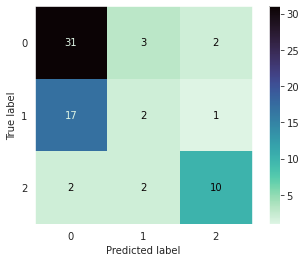

Random forest classifier
--------------------
--------------------
Accuracy Score : 61.43%
              precision    recall  f1-score   support

           0       0.62      0.89      0.73        36
           1       0.33      0.10      0.15        20
           2       0.75      0.64      0.69        14

    accuracy                           0.61        70
   macro avg       0.57      0.54      0.52        70
weighted avg       0.56      0.61      0.56        70



XGB classifier
--------------------
--------------------
Accuracy Score : 64.29%
              precision    recall  f1-score   support

           0       0.62      0.92      0.74        36
           1       0.25      0.05      0.08        20
           2       0.85      0.79      0.81        14

    accuracy                           0.64        70
   macro avg       0.57      0.58      0.55        70
weighted avg       0.56      0.64      0.57        70



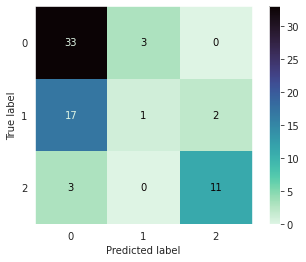

K neighbors
--------------------
--------------------
Accuracy Score : 65.71%
              precision    recall  f1-score   support

           0       0.63      0.92      0.75        36
           1       0.50      0.20      0.29        20
           2       0.90      0.64      0.75        14

    accuracy                           0.66        70
   macro avg       0.68      0.59      0.60        70
weighted avg       0.65      0.66      0.62        70



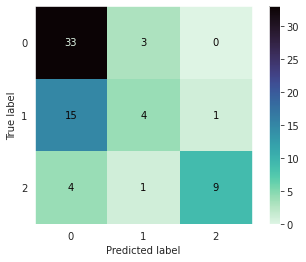

Decision tree classifier
--------------------
--------------------
Accuracy Score : 62.86%
              precision    recall  f1-score   support

           0       0.63      0.81      0.71        36
           1       0.40      0.20      0.27        20
           2       0.79      0.79      0.79        14

    accuracy                           0.63        70
   macro avg       0.61      0.60      0.59        70
weighted avg       0.60      0.63      0.60        70



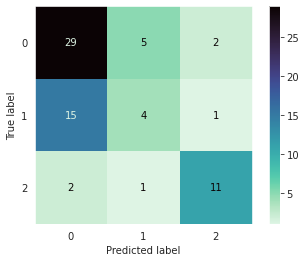

SVM
--------------------
--------------------
Accuracy Score : 62.86%
              precision    recall  f1-score   support

           0       0.61      0.94      0.74        36
           1       0.00      0.00      0.00        20
           2       0.71      0.71      0.71        14

    accuracy                           0.63        70
   macro avg       0.44      0.55      0.48        70
weighted avg       0.46      0.63      0.52        70



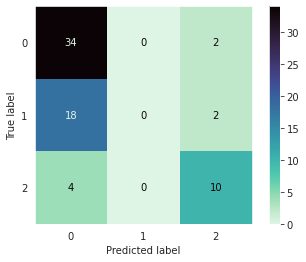

Linear discriminant analysis
--------------------
--------------------
Accuracy Score : 62.86%
              precision    recall  f1-score   support

           0       0.63      0.92      0.75        36
           1       0.25      0.05      0.08        20
           2       0.71      0.71      0.71        14

    accuracy                           0.63        70
   macro avg       0.53      0.56      0.52        70
weighted avg       0.54      0.63      0.55        70



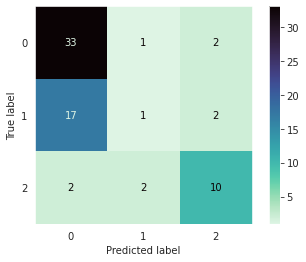

Decision tree classifier
--------------------
--------------------
Accuracy Score : 62.86%
              precision    recall  f1-score   support

           0       0.63      0.92      0.75        36
           1       0.25      0.05      0.08        20
           2       0.71      0.71      0.71        14

    accuracy                           0.63        70
   macro avg       0.53      0.56      0.52        70
weighted avg       0.54      0.63      0.55        70



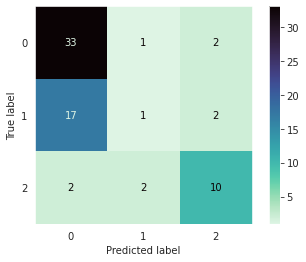

In [52]:
test_classification_models(X_train, X_test, y_train, y_test)

### Experiments with oversampled data


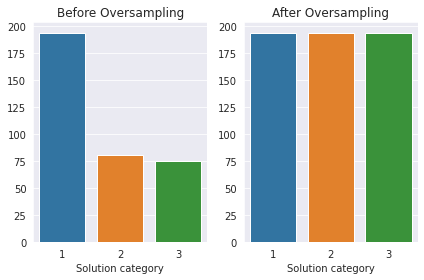

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.barplot(x=['1', '2', '3'], y =[sum(y == 0), sum(y == 1), sum(y == 2)], ax = ax1)
ax1.set_title("Before Oversampling")
ax1.set_xlabel('Solution category')

#Using SMOTE to balance the Data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2) 
X_oversampled, y_oversampled = sm.fit_resample(X, y) 

sns.barplot(x=['1', '2', '3'], y =[sum(y_oversampled == 0), sum(y_oversampled == 1), sum(y_oversampled == 2)], ax = ax2)
ax2.set_title("After Oversampling")
ax2.set_xlabel('Solution category')

plt.tight_layout()
plt.show()

In [54]:
X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_oversampled, y_oversampled, test_size=0.20, random_state = 0)

Logistic regression
--------------------
--------------------
Accuracy Score : 62.39%
              precision    recall  f1-score   support

           0       0.63      0.67      0.65        36
           1       0.42      0.33      0.37        39
           2       0.75      0.86      0.80        42

    accuracy                           0.62       117
   macro avg       0.60      0.62      0.61       117
weighted avg       0.60      0.62      0.61       117



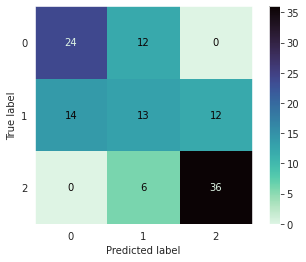

Gaussian NB
--------------------
--------------------
Accuracy Score : 62.39%
              precision    recall  f1-score   support

           0       0.59      0.75      0.66        36
           1       0.41      0.18      0.25        39
           2       0.72      0.93      0.81        42

    accuracy                           0.62       117
   macro avg       0.57      0.62      0.57       117
weighted avg       0.58      0.62      0.58       117



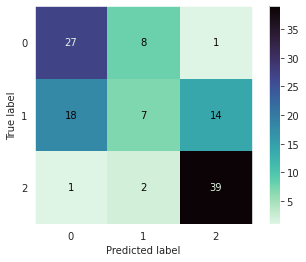

Random forest classifier
--------------------
--------------------
Accuracy Score : 83.76%
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        36
           1       0.80      0.72      0.76        39
           2       0.89      0.95      0.92        42

    accuracy                           0.84       117
   macro avg       0.83      0.83      0.83       117
weighted avg       0.84      0.84      0.84       117



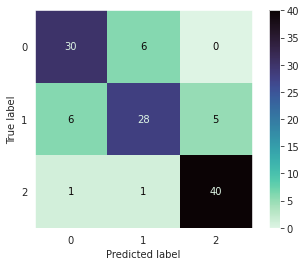

XGB classifier
--------------------
--------------------
Accuracy Score : 79.49%
              precision    recall  f1-score   support

           0       0.74      0.81      0.77        36
           1       0.78      0.64      0.70        39
           2       0.85      0.93      0.89        42

    accuracy                           0.79       117
   macro avg       0.79      0.79      0.79       117
weighted avg       0.79      0.79      0.79       117



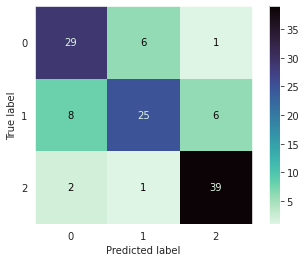

K neighbors
--------------------
--------------------
Accuracy Score : 77.78%
              precision    recall  f1-score   support

           0       0.79      0.64      0.71        36
           1       0.66      0.79      0.72        39
           2       0.90      0.88      0.89        42

    accuracy                           0.78       117
   macro avg       0.79      0.77      0.77       117
weighted avg       0.79      0.78      0.78       117



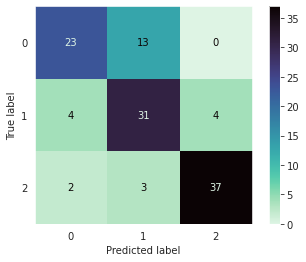

Decision tree classifier
--------------------
--------------------
Accuracy Score : 71.79%
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        36
           1       0.65      0.62      0.63        39
           2       0.84      0.88      0.86        42

    accuracy                           0.72       117
   macro avg       0.71      0.71      0.71       117
weighted avg       0.71      0.72      0.72       117



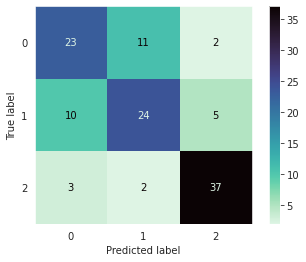

SVM
--------------------
--------------------
Accuracy Score : 61.54%
              precision    recall  f1-score   support

           0       0.60      0.69      0.64        36
           1       0.35      0.18      0.24        39
           2       0.73      0.95      0.82        42

    accuracy                           0.62       117
   macro avg       0.56      0.61      0.57       117
weighted avg       0.56      0.62      0.57       117



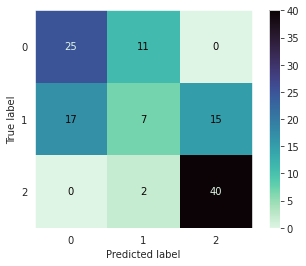

Linear discriminant analysis
--------------------
--------------------
Accuracy Score : 62.39%
              precision    recall  f1-score   support

           0       0.62      0.72      0.67        36
           1       0.38      0.21      0.27        39
           2       0.72      0.93      0.81        42

    accuracy                           0.62       117
   macro avg       0.57      0.62      0.58       117
weighted avg       0.58      0.62      0.59       117



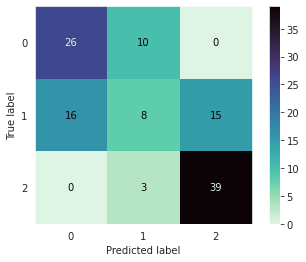

Decision tree classifier
--------------------
--------------------
Accuracy Score : 62.39%
              precision    recall  f1-score   support

           0       0.62      0.72      0.67        36
           1       0.38      0.21      0.27        39
           2       0.72      0.93      0.81        42

    accuracy                           0.62       117
   macro avg       0.57      0.62      0.58       117
weighted avg       0.58      0.62      0.59       117



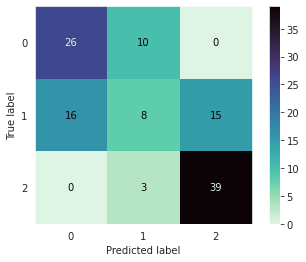

In [55]:
test_classification_models(X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled)

## Classification experiments with dataset with statistical values for the every jumbo n/10 of the input

### Experiments with original data

In [56]:
extended_runs['Class'] = extended_runs.apply (lambda row: classification_condition(row), axis=1)

In [57]:
# Splitting into features and value to be predicted
X = extended_runs.drop(columns=['Run number', 'Total waste percentage', 'Class'])
y = extended_runs['Class']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

Logistic regression
--------------------
--------------------
Accuracy Score : 74.29%
              precision    recall  f1-score   support

           0       0.76      0.97      0.86        40
           1       0.00      0.00      0.00        15
           2       0.68      0.87      0.76        15

    accuracy                           0.74        70
   macro avg       0.48      0.61      0.54        70
weighted avg       0.58      0.74      0.65        70



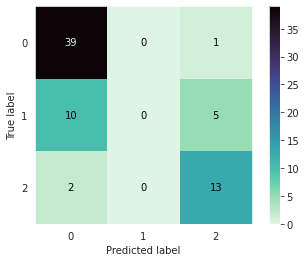

Gaussian NB
--------------------
--------------------
Accuracy Score : 57.14%
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        40
           1       0.08      0.07      0.07        15
           2       0.50      0.80      0.62        15

    accuracy                           0.57        70
   macro avg       0.46      0.51      0.47        70
weighted avg       0.58      0.57      0.56        70



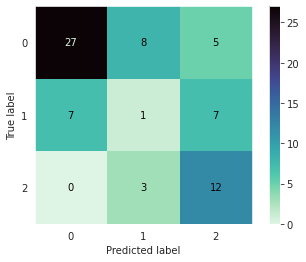

Random forest classifier
--------------------
--------------------
Accuracy Score : 70.0%
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        40
           1       0.00      0.00      0.00        15
           2       0.65      1.00      0.79        15

    accuracy                           0.70        70
   macro avg       0.47      0.62      0.53        70
weighted avg       0.58      0.70      0.63        70



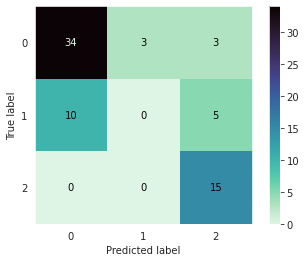

XGB classifier
--------------------
--------------------
Accuracy Score : 77.14%
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        40
           1       0.60      0.20      0.30        15
           2       0.64      0.93      0.76        15

    accuracy                           0.77        70
   macro avg       0.70      0.69      0.65        70
weighted avg       0.76      0.77      0.74        70



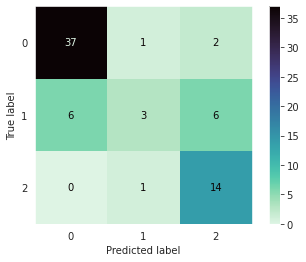

K neighbors
--------------------
--------------------
Accuracy Score : 62.86%
              precision    recall  f1-score   support

           0       0.68      0.90      0.77        40
           1       0.25      0.13      0.17        15
           2       0.67      0.40      0.50        15

    accuracy                           0.63        70
   macro avg       0.53      0.48      0.48        70
weighted avg       0.58      0.63      0.59        70



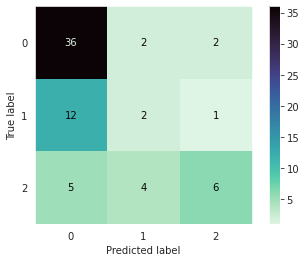

Decision tree classifier
--------------------
--------------------
Accuracy Score : 62.86%
              precision    recall  f1-score   support

           0       0.82      0.57      0.68        40
           1       0.35      0.53      0.42        15
           2       0.68      0.87      0.76        15

    accuracy                           0.63        70
   macro avg       0.62      0.66      0.62        70
weighted avg       0.69      0.63      0.64        70



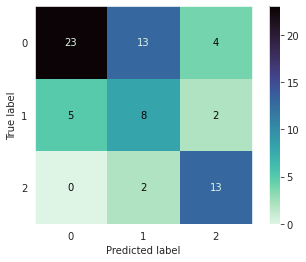

SVM
--------------------
--------------------
Accuracy Score : 64.29%
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        40
           1       0.00      0.00      0.00        15
           2       0.83      0.33      0.48        15

    accuracy                           0.64        70
   macro avg       0.49      0.44      0.42        70
weighted avg       0.54      0.64      0.54        70



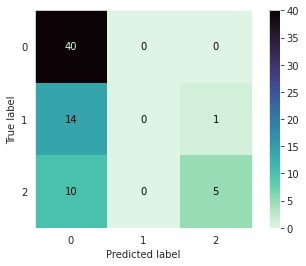

Linear discriminant analysis
--------------------
--------------------
Accuracy Score : 61.43%
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        40
           1       0.15      0.13      0.14        15
           2       0.65      0.73      0.69        15

    accuracy                           0.61        70
   macro avg       0.52      0.54      0.53        70
weighted avg       0.60      0.61      0.61        70



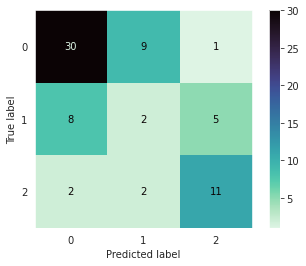

Decision tree classifier
--------------------
--------------------
Accuracy Score : 61.43%
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        40
           1       0.15      0.13      0.14        15
           2       0.65      0.73      0.69        15

    accuracy                           0.61        70
   macro avg       0.52      0.54      0.53        70
weighted avg       0.60      0.61      0.61        70



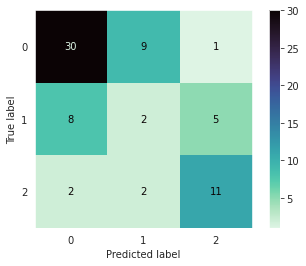

In [59]:
test_classification_models(X_train, X_test, y_train, y_test)

### Experiments with oversampled data


In [60]:
sm = SMOTE(random_state = 2) 
X_oversampled, y_oversampled = sm.fit_resample(X, y) 

In [61]:
X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_oversampled, y_oversampled, test_size=0.20, random_state = 0)

Logistic regression
--------------------
--------------------
Accuracy Score : 58.97%
              precision    recall  f1-score   support

           0       0.59      0.55      0.57        40
           1       0.46      0.40      0.43        45
           2       0.71      0.91      0.79        32

    accuracy                           0.59       117
   macro avg       0.59      0.62      0.60       117
weighted avg       0.57      0.59      0.58       117



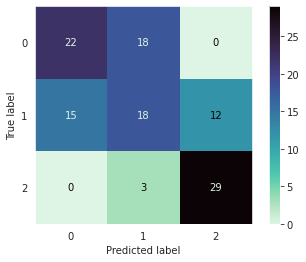

Gaussian NB
--------------------
--------------------
Accuracy Score : 62.39%
              precision    recall  f1-score   support

           0       0.65      0.60      0.62        40
           1       0.54      0.42      0.48        45
           2       0.67      0.94      0.78        32

    accuracy                           0.62       117
   macro avg       0.62      0.65      0.63       117
weighted avg       0.61      0.62      0.61       117



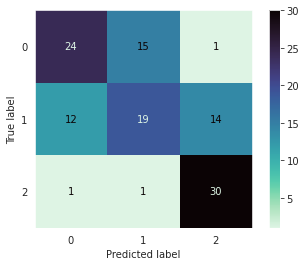

Random forest classifier
--------------------
--------------------
Accuracy Score : 83.76%
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        40
           1       0.91      0.69      0.78        45
           2       0.71      1.00      0.83        32

    accuracy                           0.84       117
   macro avg       0.85      0.85      0.84       117
weighted avg       0.86      0.84      0.84       117



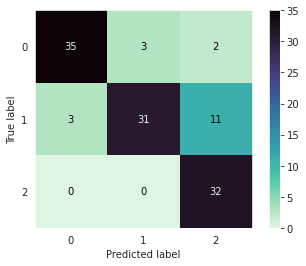

XGB classifier
--------------------
--------------------
Accuracy Score : 79.49%
              precision    recall  f1-score   support

           0       0.83      0.72      0.77        40
           1       0.77      0.73      0.75        45
           2       0.79      0.97      0.87        32

    accuracy                           0.79       117
   macro avg       0.80      0.81      0.80       117
weighted avg       0.80      0.79      0.79       117



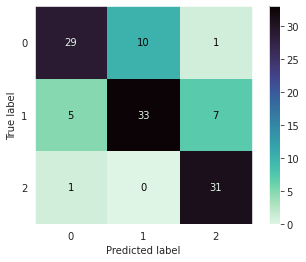

K neighbors
--------------------
--------------------
Accuracy Score : 71.79%
              precision    recall  f1-score   support

           0       0.74      0.57      0.65        40
           1       0.71      0.71      0.71        45
           2       0.71      0.91      0.79        32

    accuracy                           0.72       117
   macro avg       0.72      0.73      0.72       117
weighted avg       0.72      0.72      0.71       117



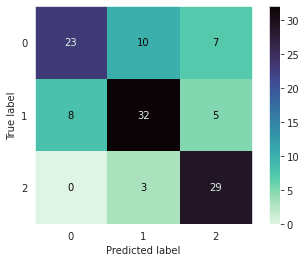

Decision tree classifier
--------------------
--------------------
Accuracy Score : 68.38%
              precision    recall  f1-score   support

           0       0.65      0.55      0.59        40
           1       0.62      0.71      0.66        45
           2       0.84      0.81      0.83        32

    accuracy                           0.68       117
   macro avg       0.70      0.69      0.69       117
weighted avg       0.69      0.68      0.68       117



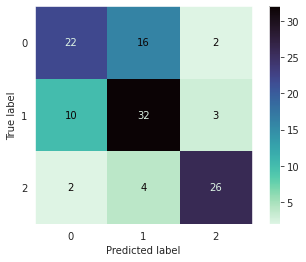

SVM
--------------------
--------------------
Accuracy Score : 54.7%
              precision    recall  f1-score   support

           0       0.61      0.50      0.55        40
           1       0.59      0.29      0.39        45
           2       0.50      0.97      0.66        32

    accuracy                           0.55       117
   macro avg       0.57      0.59      0.53       117
weighted avg       0.57      0.55      0.52       117



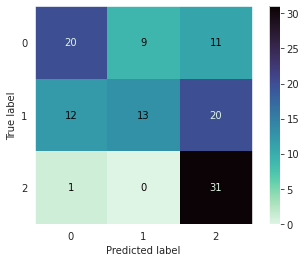

Linear discriminant analysis
--------------------
--------------------
Accuracy Score : 67.52%
              precision    recall  f1-score   support

           0       0.79      0.65      0.71        40
           1       0.58      0.56      0.57        45
           2       0.68      0.88      0.77        32

    accuracy                           0.68       117
   macro avg       0.68      0.69      0.68       117
weighted avg       0.68      0.68      0.67       117



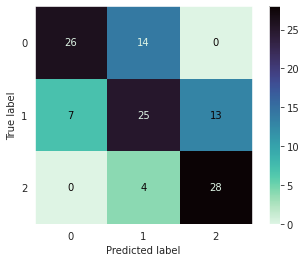

Decision tree classifier
--------------------
--------------------
Accuracy Score : 67.52%
              precision    recall  f1-score   support

           0       0.79      0.65      0.71        40
           1       0.58      0.56      0.57        45
           2       0.68      0.88      0.77        32

    accuracy                           0.68       117
   macro avg       0.68      0.69      0.68       117
weighted avg       0.68      0.68      0.67       117



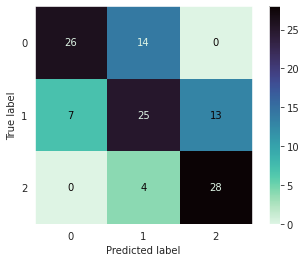

In [62]:
test_classification_models(X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled)

# Exploratory regression experiments with statistical values for the whole jumbo

In [80]:
X = runs.drop(columns=['Run number', 'Total waste percentage', 'Number of orders', 'Class'])
y = runs['Total waste percentage']

In [81]:
X

Max width  Min width  ...  Number of ordered reels  Weighted average width
0         4900        800  ...               442.910547             2709.066292
1         4900        500  ...               432.623483             2574.588114
2         4900        700  ...               380.490872             3314.418176
3         4100       1200  ...               218.253272             2974.281246
4         4400       1300  ...               224.999823             2674.563460
..         ...        ...  ...                      ...                     ...
345       5000        500  ...              2121.256167             2815.527512
346       4800        500  ...              1687.694415             2278.561711
347       4800        500  ...              1269.308554             2988.288095
348       5000        500  ...              2325.504292             2644.072991
349       5000        500  ...              1493.986366             2722.454525

[350 rows x 6 columns]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [83]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[08:11:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [84]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000499
6                    XGBRFRegressor  ...             0.000122
7  Polynomial regression 2nd degree  ...             0.000003
8  Polynomial regression 3nd degree  ...             0.000004
5             DecisionTreeRegressor  ...             0.000033
3                     BayesianRidge  ...             0.000030
0                 Linear regression  ...             0.000086
2                        ElasticNet  ...             0.000029
1                     SGD regressor  ...             0.000031

[9 rows x 5 columns]

## Results with stratified K fold validation

In [85]:
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet, BayesianRidge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor
from sklearn.preprocessing import PolynomialFeatures
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def test_regression_models_with_K_Fold_Validation(l_x, l_y, k = 10, repeats = 3):
  results = {}
  names_list = []
  mean_absolute_error_score = []
  # prepare the cross-validation procedure
  cv = RepeatedKFold(n_splits=k, n_repeats=repeats, random_state=1)

  names_list.append('Linear regression')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(LinearRegression(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('SGD regressor')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(SGDRegressor(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('ElasticNet')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(ElasticNet(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('BayesianRidge')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(BayesianRidge(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('RandomForestRegressor')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(RandomForestRegressor(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('DecisionTreeRegressor')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(DecisionTreeRegressor(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('XGBRFRegressor')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(XGBRFRegressor(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('Polynomial regression 2nd degree')
  poly_reg = PolynomialFeatures(degree=2)
  mean_absolute_error_score.append(-1*(mean(cross_val_score(LinearRegression(), poly_reg.fit_transform(l_x), l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('Polynomial regression 3nd degree')
  poly_reg = PolynomialFeatures(degree=3)
  mean_absolute_error_score.append(-1*(mean(cross_val_score(LinearRegression(), poly_reg.fit_transform(l_x), l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  data = {'Model name':names_list,
          'Mean absolute error':mean_absolute_error_score}
          
  return pd.DataFrame.from_dict(data).sort_values(by=['Mean absolute error'])

In [86]:
results = test_regression_models_with_K_Fold_Validation(X, y)

In [87]:
results

Model name  Mean absolute error
4             RandomForestRegressor         9.131048e-01
6                    XGBRFRegressor         9.468547e-01
5             DecisionTreeRegressor         1.185763e+00
7  Polynomial regression 2nd degree         1.328774e+00
8  Polynomial regression 3nd degree         1.371351e+00
3                     BayesianRidge         1.381486e+00
2                        ElasticNet         1.391534e+00
0                 Linear regression         1.391610e+00
1                     SGD regressor         1.804427e+16

## Pass input from MinMaxScaler

In [88]:
from sklearn import preprocessing

In [89]:
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state = 0)

In [91]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[08:11:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [92]:
results

Model name  ...  Prediction time (s)
6                    XGBRFRegressor  ...             0.000005
4             RandomForestRegressor  ...             0.000125
7  Polynomial regression 2nd degree  ...             0.000001
5             DecisionTreeRegressor  ...             0.000002
1                     SGD regressor  ...             0.000003
3                     BayesianRidge  ...             0.000002
0                 Linear regression  ...             0.000002
8  Polynomial regression 3nd degree  ...             0.000002
2                        ElasticNet  ...             0.000003

[9 rows x 5 columns]

In [93]:
results = test_regression_models_with_K_Fold_Validation(x_scaled, y)

In [94]:
results

Model name  Mean absolute error
4             RandomForestRegressor             0.920020
6                    XGBRFRegressor             0.946845
7  Polynomial regression 2nd degree             1.055426
5             DecisionTreeRegressor             1.204782
1                     SGD regressor             1.329155
3                     BayesianRidge             1.375566
0                 Linear regression             1.391610
2                        ElasticNet             1.612608
8  Polynomial regression 3nd degree             1.715194

## Pass input from StandardScaler


In [95]:
standardScaler = preprocessing.StandardScaler()
x_standarized = standardScaler.fit_transform(X)

In [99]:
X.columns


Index(['Max width', 'Min width', 'Average reel width', 'Deviation of widths',
       'Number of ordered reels', 'Weighted average width'],
      dtype='object')

In [100]:
x_standarized = pd.DataFrame(x_standarized, columns=['Max width', 'Min width', 'Average reel width', 'Deviation of widths',
       'Number of ordered reels', 'Weighted average width'])

In [101]:
X_train, X_test, y_train, y_test = train_test_split(x_standarized, y, test_size=0.20, random_state = 0)

In [102]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[08:13:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [103]:
results

Model name  ...  Prediction time (s)
6                    XGBRFRegressor  ...             0.000013
4             RandomForestRegressor  ...             0.000155
7  Polynomial regression 2nd degree  ...             0.000002
5             DecisionTreeRegressor  ...             0.000017
2                        ElasticNet  ...             0.000016
3                     BayesianRidge  ...             0.000015
1                     SGD regressor  ...             0.000030
0                 Linear regression  ...             0.000021
8  Polynomial regression 3nd degree  ...             0.000003

[9 rows x 5 columns]

In [104]:
results = test_regression_models_with_K_Fold_Validation(x_standarized, y)

In [105]:
results

Model name  Mean absolute error
4             RandomForestRegressor             0.913223
6                    XGBRFRegressor             0.946841
7  Polynomial regression 2nd degree             1.075365
5             DecisionTreeRegressor             1.173093
2                        ElasticNet             1.313405
3                     BayesianRidge             1.374945
1                     SGD regressor             1.389232
0                 Linear regression             1.391610
8  Polynomial regression 3nd degree             1.406820

## Model tuning

In [106]:
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd2
def calculate_feature_importance(l_model, l_x, l_y, use_property_coef = False):
  column_name = 'feature importance'
  if (use_property_coef):
    column_name = 'weights'
  l_x_train, l_x_test, l_y_train, l_y_test = train_test_split(l_x, l_y, test_size=0.20, random_state = 0)
  l_model.fit(l_x_train, l_y_train)
  column_name_list = []
  feature_importance_list = []
  for i in range(len(l_x.columns)):
    column_name_list.append(l_x.columns[i])
    if not use_property_coef:
      feature_importance_list.append(l_model.feature_importances_[i])
      continue
    feature_importance_list.append(l_model.coef_[i])
  # initialize data of lists.
  data = {'Column name':column_name_list,
          column_name :feature_importance_list}
  return pd2.DataFrame.from_dict(data).sort_values(by=[column_name], ascending=False)

### Bayesian ridge regressor tuning

In [ ]:
random_grid = {"n_iter": np.arange(100, 10000, 100),
                      "alpha_1": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "alpha_2": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "lambda_1": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "lambda_2": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "fit_intercept" : [True, False],
                      "normalize": [True, False]
                      }
br = BayesianRidge()
br_random = RandomizedSearchCV(estimator = br, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
br_random.fit(x_standarized, y)
br_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha_1': 1e-06,
 'alpha_2': 1e-05,
 'fit_intercept': True,
 'lambda_1': 0.01,
 'lambda_2': 1e-07,
 'n_iter': 3400,
 'normalize': False}

In [107]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
br = BayesianRidge(alpha_1 = 1e-06, alpha_2 = 1e-05, lambda_1 = 0.01, lambda_2 = 1e-07, n_iter = 3400)
'MAE :%.3f' % (-1*(mean(cross_val_score(br, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'MAE :1.375'

In [108]:
feature_importance = calculate_feature_importance(BayesianRidge(alpha_1 = 1e-06, alpha_2 = 1e-05, lambda_1 = 0.01, lambda_2 = 1e-07, n_iter = 3400), x_standarized, y, True)

In [109]:
feature_importance

Column name   weights
5   Weighted average width  1.176609
1                Min width  0.433434
2       Average reel width  0.046081
0                Max width  0.012132
3      Deviation of widths -0.140826
4  Number of ordered reels -0.498461

### Random forest regressor tuning

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
# Fit the random search model
rf_random.fit(x_standarized, y)
# Fit the random search model
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [110]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(max_depth =20, min_samples_leaf= 1, min_samples_split = 2 ,n_estimators= 1000, max_features= 'sqrt')
'MAE :%.3f' % (-1*(mean(cross_val_score(rf, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'MAE :0.885'

In [111]:
feature_importance = calculate_feature_importance(RandomForestRegressor(max_depth =20, min_samples_leaf= 1, min_samples_split = 2 ,n_estimators= 1000, max_features= 'sqrt'), x_standarized, y)

In [112]:
feature_importance

Column name  feature importance
5   Weighted average width            0.360229
2       Average reel width            0.277303
4  Number of ordered reels            0.138114
1                Min width            0.107782
3      Deviation of widths            0.083103
0                Max width            0.033470

### Decision tree regressor tuning

In [113]:
criterion = ['squared_error', 'friedman_mse', "absolute_error", "poisson"]
splitter = ['best', 'random']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

random_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}

In [114]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dtr = DecisionTreeRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dtr_random = RandomizedSearchCV(estimator = dtr, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
dtr_random.fit(x_standarized, y)
dtr_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'criterion': 'squared_error',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'splitter': 'random'}

In [116]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
dtr = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 40, max_features= 'auto', min_samples_leaf=2, min_samples_split=10, splitter= 'random')
'DecisionTreeClassifier after tuning MAE :%.3f' % (-1*(mean(cross_val_score(dtr, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'DecisionTreeClassifier after tuning MAE :1.053'

In [117]:
feature_importance = calculate_feature_importance(DecisionTreeRegressor(criterion = 'squared_error', max_depth = 40, max_features= 'auto', min_samples_leaf=2, min_samples_split=10, splitter= 'random'), x_standarized, y)

In [118]:
feature_importance

Column name  feature importance
2       Average reel width            0.541101
0                Max width            0.222852
1                Min width            0.100663
5   Weighted average width            0.061040
4  Number of ordered reels            0.054209
3      Deviation of widths            0.020135

### Elastic net regressor tuning

In [ ]:
random_grid = {"max_iter": [1, 5, 10, 100, 1000],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1),
                      "selection": ["cyclic", "random"]}
en = ElasticNet()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
en_random = RandomizedSearchCV(estimator = en, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
en_random.fit(x_standarized, y)
en_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha': 0.1,
 'l1_ratio': 0.30000000000000004,
 'max_iter': 1,
 'selection': 'random'}

In [119]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
'ElasticNet after tuning MAE :%.3f' % (-1*(mean(cross_val_score(ElasticNet(alpha=0.1, l1_ratio=0.3, max_iter = 1, selection= 'random'), x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'ElasticNet after tuning MAE :1.384'

In [120]:
feature_importance = calculate_feature_importance(ElasticNet(alpha=0.1, l1_ratio=0.3, max_iter = 1, selection= 'random'), x_standarized, y, True)

In [121]:
feature_importance

Column name   weights
5   Weighted average width  1.263152
1                Min width  0.586354
0                Max width  0.181213
3      Deviation of widths  0.000000
4  Number of ordered reels  0.000000
2       Average reel width -0.144277

### SGD regressor tuning

In [ ]:
penalty = ['l2', 'l1', 'elasticnet']
alpha = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
l1_ratio = np.arange(0.05, 1.0, 0.05)
max_iter = np.arange(100, 10000, 100)
tolerance = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
epsilon = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
learning_rate =  ['invscaling', 'constant', 'optimal', 'adaptive']

random_grid = {'penalty':penalty,
               'alpha': alpha,
               'l1_ratio': l1_ratio,
               'max_iter': max_iter,
               'tol': tolerance,
               'epsilon': epsilon,
               'learning_rate': learning_rate}
sgd = SGDRegressor()
sgd_random = RandomizedSearchCV(estimator = sgd, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
sgd_random.fit(x_standarized, y)
sgd_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha': 0.1,
 'epsilon': 1e-09,
 'l1_ratio': 0.8500000000000001,
 'learning_rate': 'constant',
 'max_iter': 6100,
 'penalty': 'l2',
 'tol': 1e-08}

In [122]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
'SGD after tuning MAE :%.3f' % (-1*(mean(cross_val_score(SGDRegressor(alpha=0.1, l1_ratio=0.85, epsilon=1e-09, learning_rate='constant', max_iter = 6100, penalty= 'l2', tol=1e-08), x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'SGD after tuning MAE :1.397'

In [123]:
feature_importance = calculate_feature_importance(SGDRegressor(alpha=0.1, l1_ratio=0.85, epsilon=1e-09, learning_rate='constant', max_iter = 6100, penalty= 'l2', tol=1e-08), x_standarized, y, True)

In [124]:
feature_importance

Column name   weights
5   Weighted average width  0.792235
1                Min width  0.460296
2       Average reel width  0.136825
0                Max width  0.010971
3      Deviation of widths -0.156970
4  Number of ordered reels -0.457132

## Deep learning experiments

Import pre required libraries

In [170]:
import tensorflow as tf
from tensorflow.keras import Sequential as seq
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from keras.callbacks import EarlyStopping

In [171]:
tf.random.set_seed(42)

In [172]:
def plot_loss_and_val_loss(hist, loss_label = 'Mean Absolute Error (MAE)', title=''):
  fig, ax1 = plt.subplots(1, 1)
  ax1.plot(hist.epoch, hist.history['loss'], color='b', label='Loss')
  ax1.plot(hist.epoch, hist.history['val_loss'], color='orange', label='Val_loss')
  ax1.set_xticks(range(0, len(hist.epoch)))
  ax1.set_title('Training Error ' + title )
  ax1.set_ylabel(loss_label, fontsize=12)
  ax1.set_xlabel('#Epoch', fontsize=12)
  fig.set_size_inches(18.5, 10.5)
  plt.legend()
  plt.show()

In [177]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

In [176]:
epochs = 4000
batch_size = 2

In [ ]:
X

Max width  Min width  ...  Number of ordered reels  Weighted average width
0         4900        800  ...               442.910547             2709.066292
1         4900        500  ...               432.623483             2574.588114
2         4900        700  ...               380.490872             3314.418176
3         4100       1200  ...               218.253272             2974.281246
4         4400       1300  ...               224.999823             2674.563460
..         ...        ...  ...                      ...                     ...
345       5000        500  ...              2121.256167             2815.527512
346       4800        500  ...              1687.694415             2278.561711
347       4800        500  ...              1269.308554             2988.288095
348       5000        500  ...              2325.504292             2644.072991
349       5000        500  ...              1493.986366             2722.454525

[350 rows x 6 columns]

### Single dense model experiments

In [ ]:
model = seq()
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 97.
Epoch 00107: early stopping


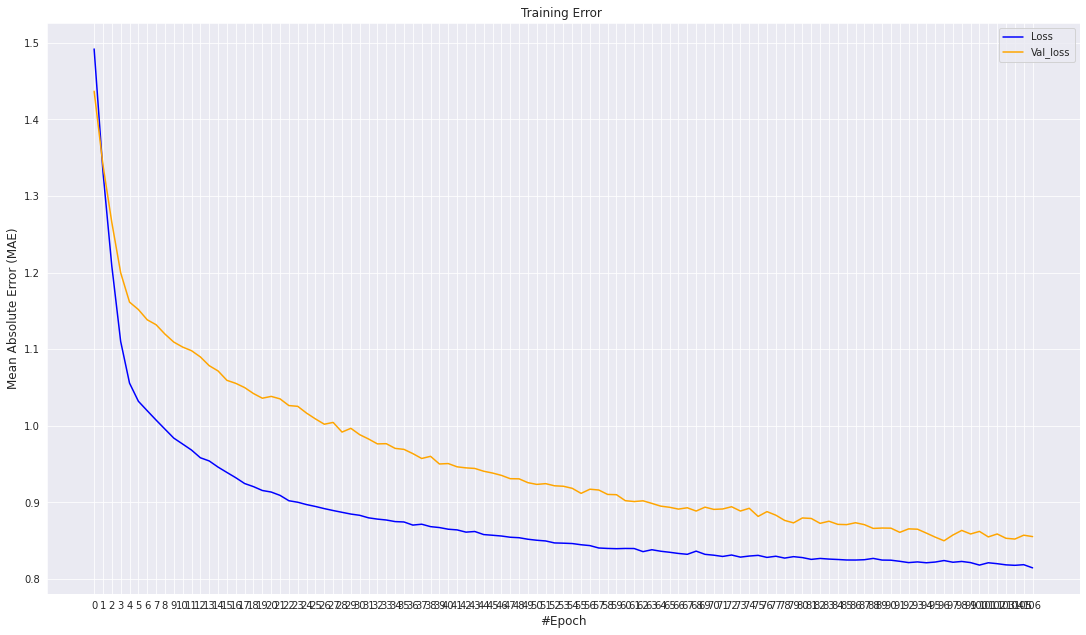

In [ ]:
plot_loss_and_val_loss(hist)

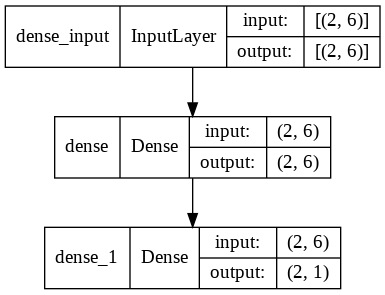

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 0.8553979396820068'

In [ ]:
model = seq()
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 80.
Epoch 00090: early stopping


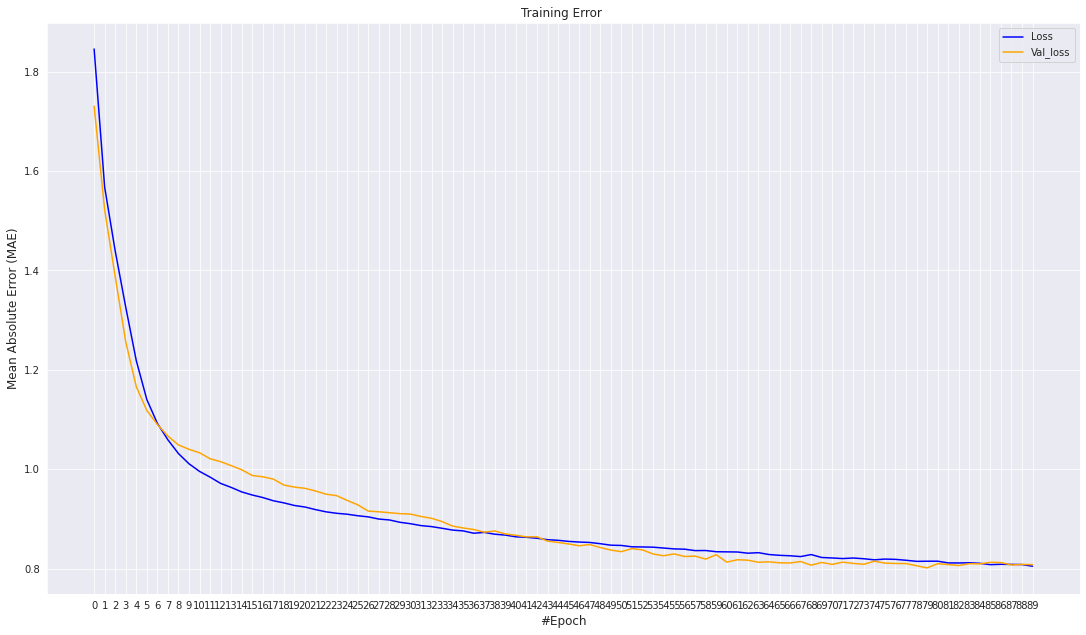

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 0.8077688217163086'

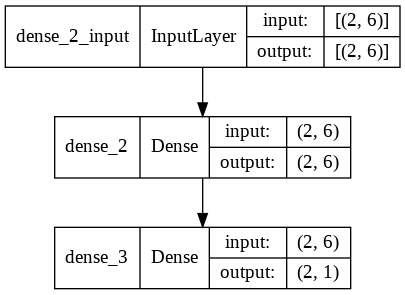

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Two denses model experiments

In [ ]:
model = seq()
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 186.
Epoch 00196: early stopping


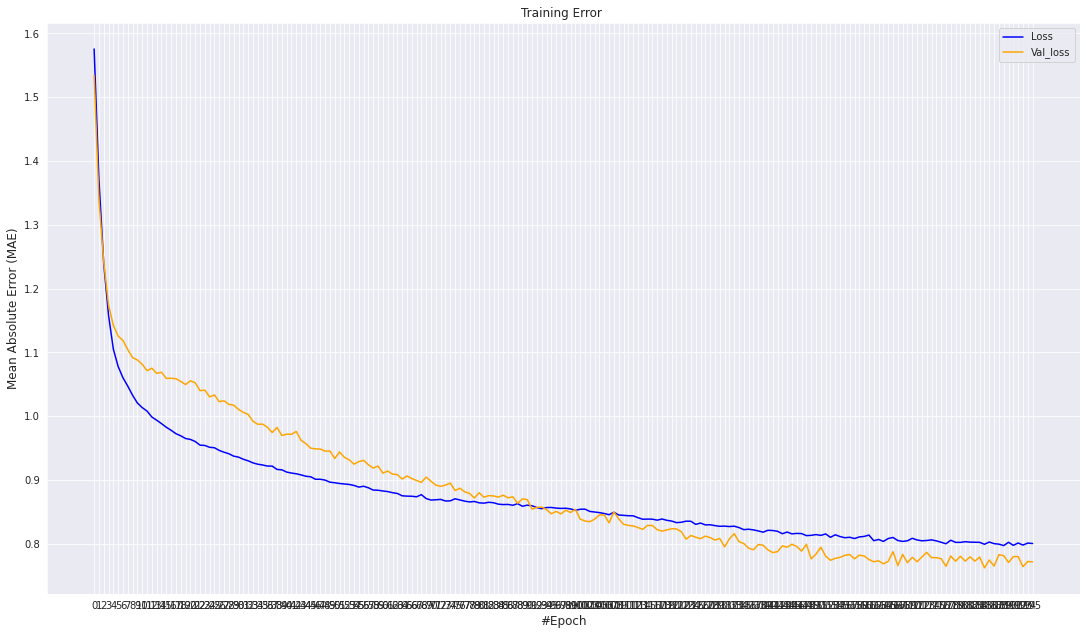

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 0.7719066143035889'

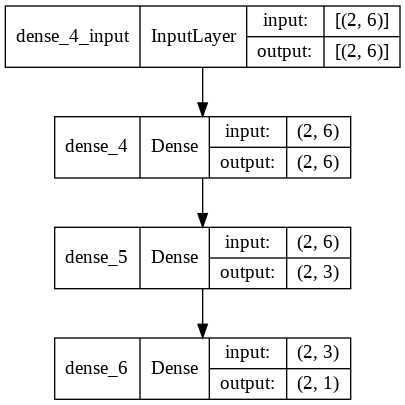

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = seq()
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 51.
Epoch 00061: early stopping


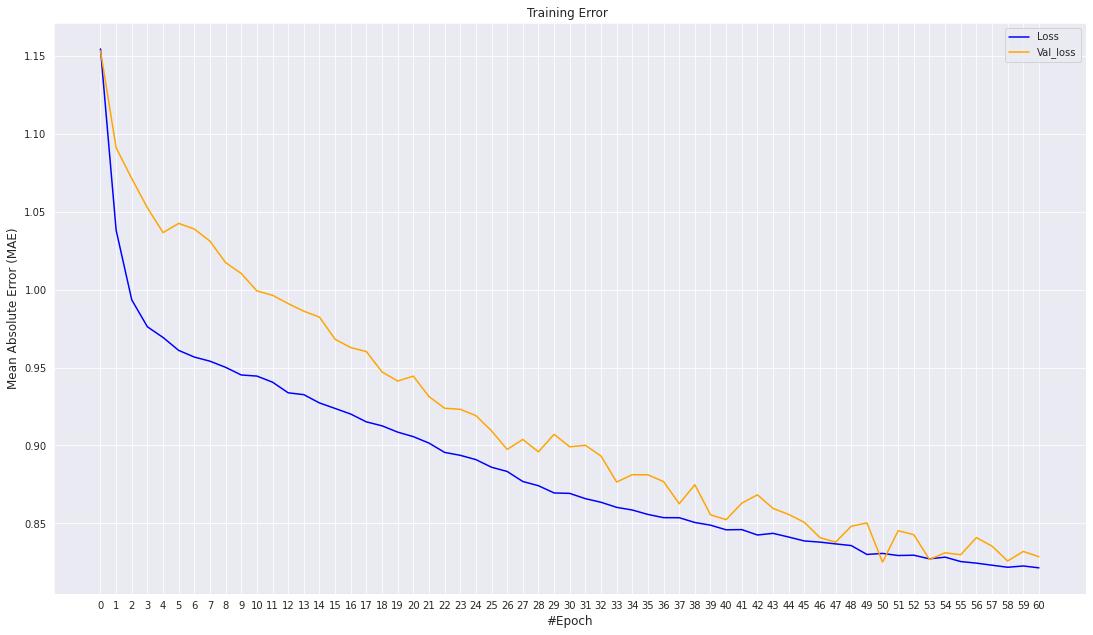

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 0.8286311626434326'

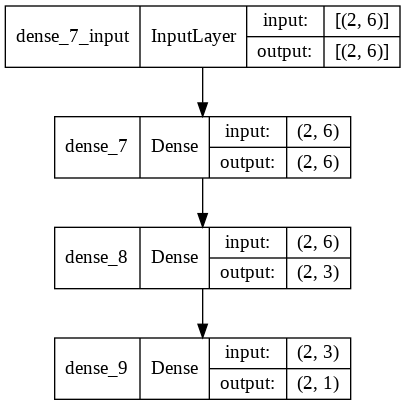

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Three denses model experiments

In [ ]:
model = seq()
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 69.
Epoch 00079: early stopping


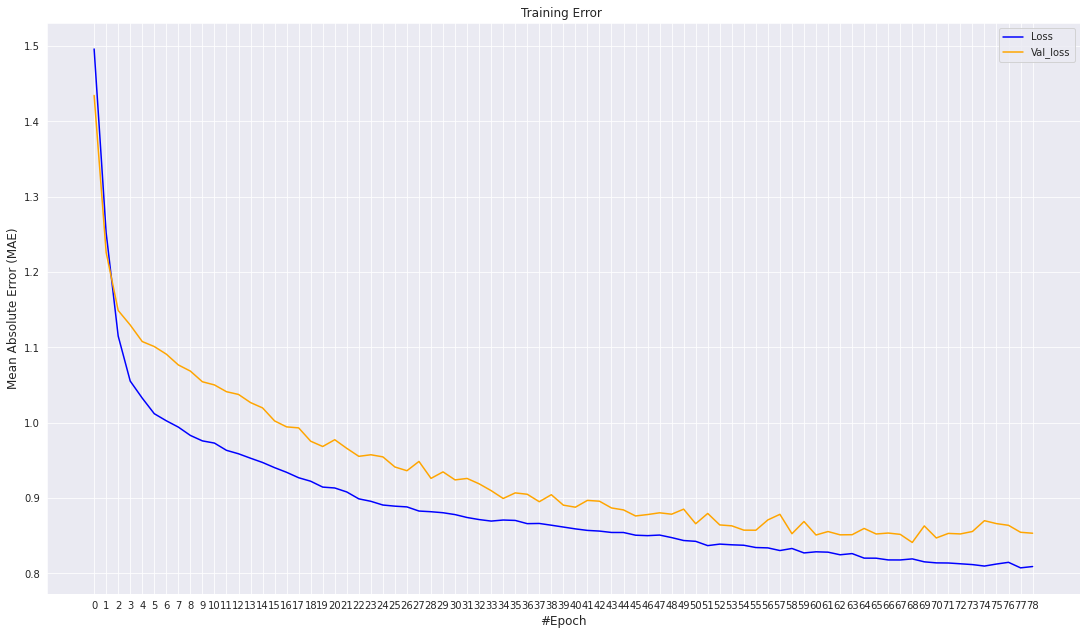

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 0.8534160852432251'

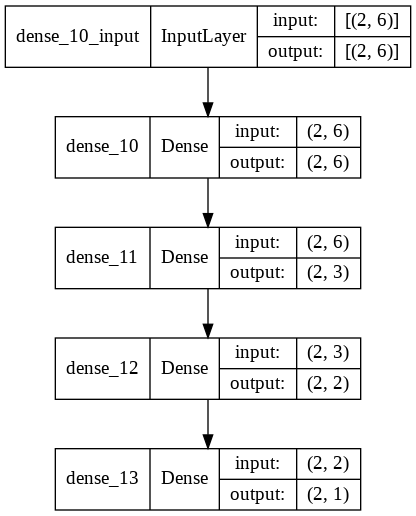

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = seq()
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 24.
Epoch 00034: early stopping


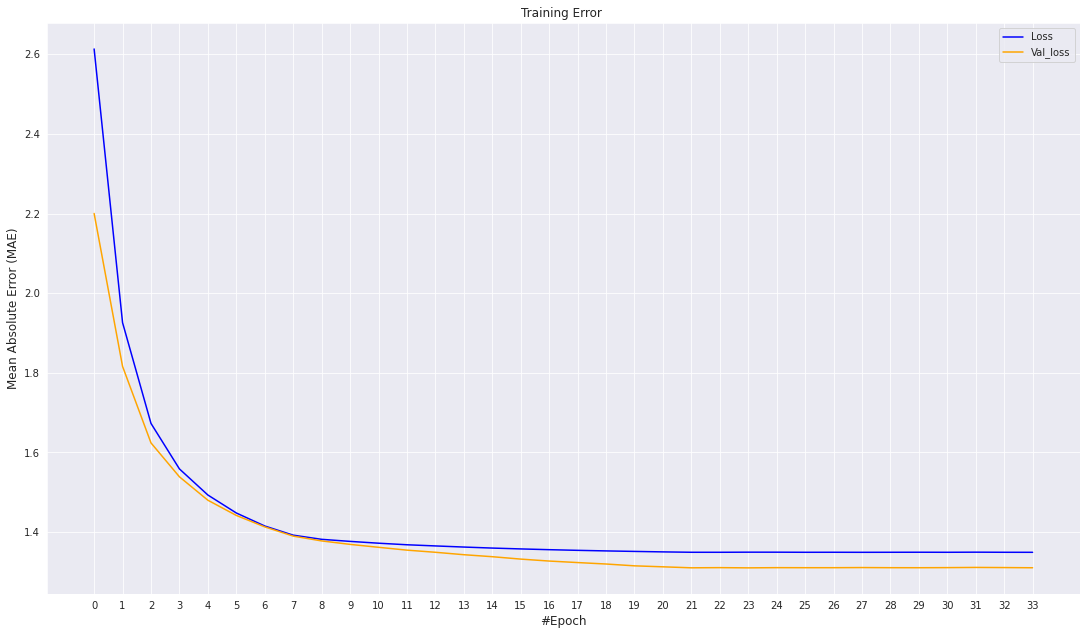

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 1.3103429079055786'

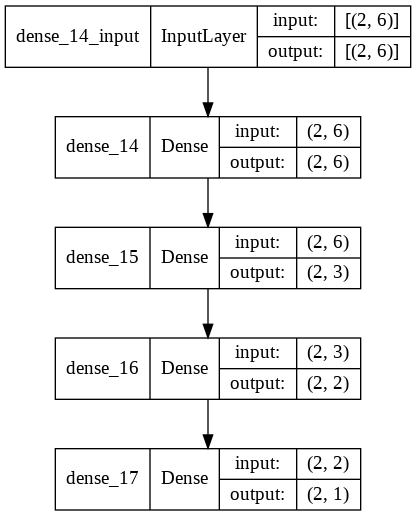

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = seq()
model.add(Dense(12, activation = 'relu', input_dim = 6))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 38.
Epoch 00048: early stopping


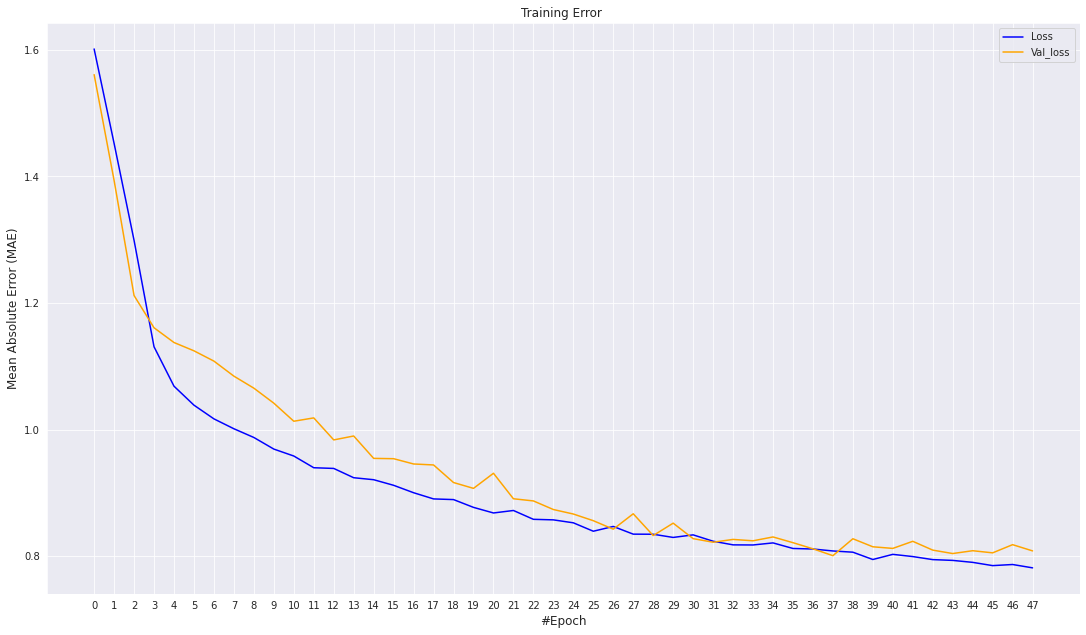

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 0.8081141710281372'

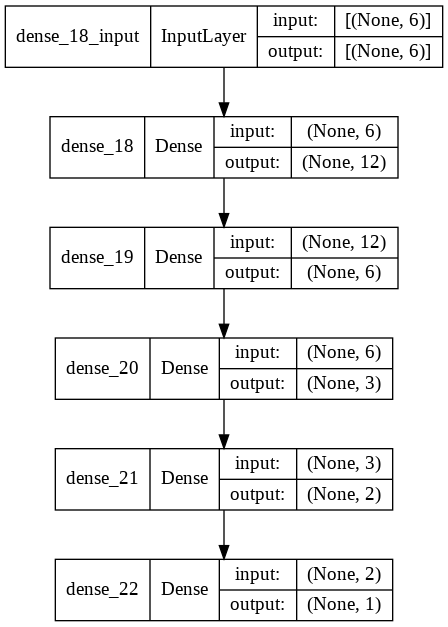

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = seq()
model.add(Dense(12, activation = 'relu', input_dim = 6))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 105.
Epoch 00115: early stopping


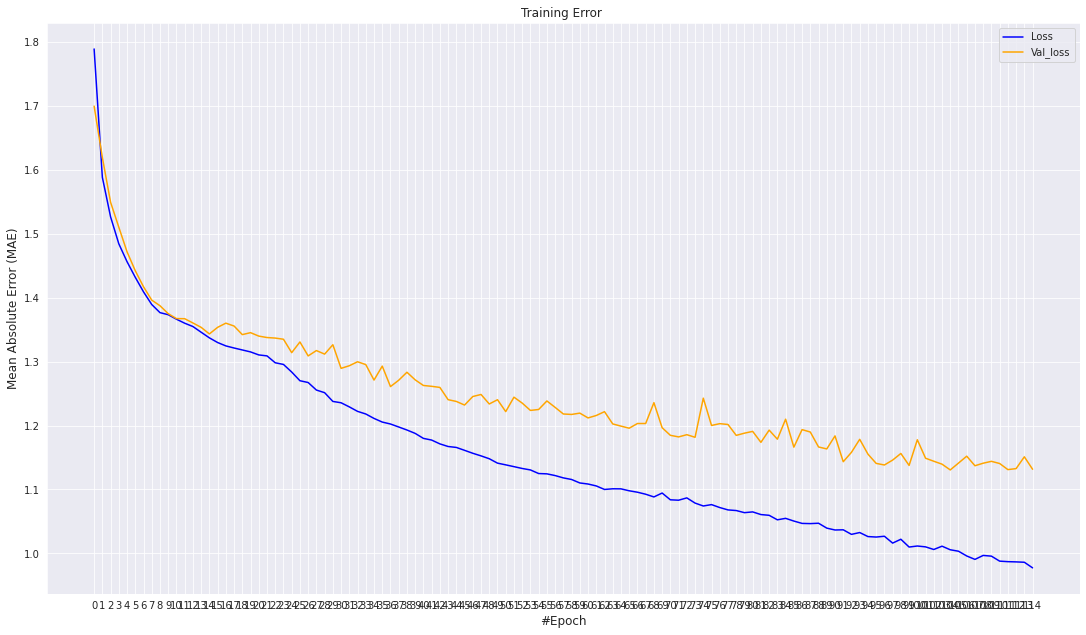

In [ ]:
plot_loss_and_val_loss(hist)

In [ ]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 1.1316455602645874'

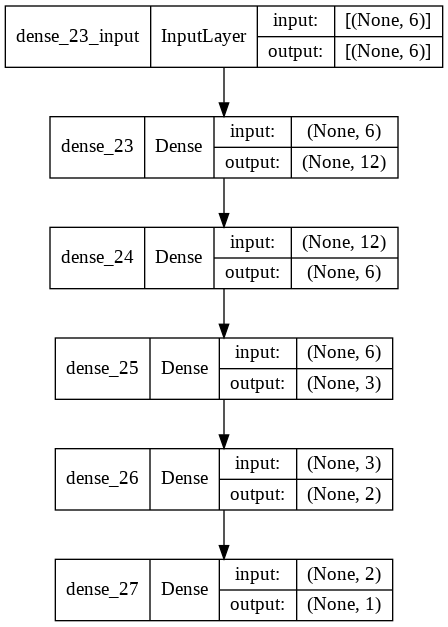

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Exploratory regression experiments with extended dataset


## Experiments after column selection

In [125]:
extended_runs.columns

Index(['Run number', 'Max width', 'Min width', 'Number of orders',
       'Average reel width', 'Deviation of widths', 'Number of orders 1',
       'Number of orders 2', 'Number of orders 3', 'Number of orders 4',
       'Number of orders 5', 'Number of orders 6', 'Number of orders 7',
       'Number of orders 8', 'Number of orders 9', 'Number of orders 10',
       'Number of ordered reels 1', 'Number of ordered reels 2',
       'Number of ordered reels 3', 'Number of ordered reels 4',
       'Number of ordered reels 5', 'Number of ordered reels 6',
       'Number of ordered reels 7', 'Number of ordered reels 8',
       'Number of ordered reels 9', 'Number of ordered reels 10',
       'MultiplicationOfReels1', 'MultiplicationOfReels2',
       'MultiplicationOfReels3', 'MultiplicationOfReels4',
       'MultiplicationOfReels5', 'MultiplicationOfReels6',
       'MultiplicationOfReels7', 'MultiplicationOfReels8',
       'MultiplicationOfReels9', 'MultiplicationOfReels10',
       'Deviation

In [126]:
extended_runs = extended_runs.drop(columns=['Class'])

In [ ]:
extended_runs_with_selected_columns = extended_runs.drop(columns=['RUNNUMBER', 'MaxWidth', 'MinWidth', 'NumberOfOrders', 'AverageWidth',
        'Deviation', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10','MultiplicationOfReels1', 'MultiplicationOfReels2',
       'MultiplicationOfReels3', 'MultiplicationOfReels4',
       'MultiplicationOfReels5', 'MultiplicationOfReels6',
       'MultiplicationOfReels7', 'MultiplicationOfReels8',
       'MultiplicationOfReels9', 'MultiplicationOfReels10','Min1', 'Min2', 'Min3', 'Min4', 'Min5', 'Min6', 'Min7', 'Min8', 'Min9',
       'Min10', 'Max1', 'Max2', 'Max3', 'Max4', 'Max5', 'Max6', 'Max7', 'Max8',
       'Max9', 'Max10'])

In [127]:
extended_runs_with_selected_columns

NameError: ignored

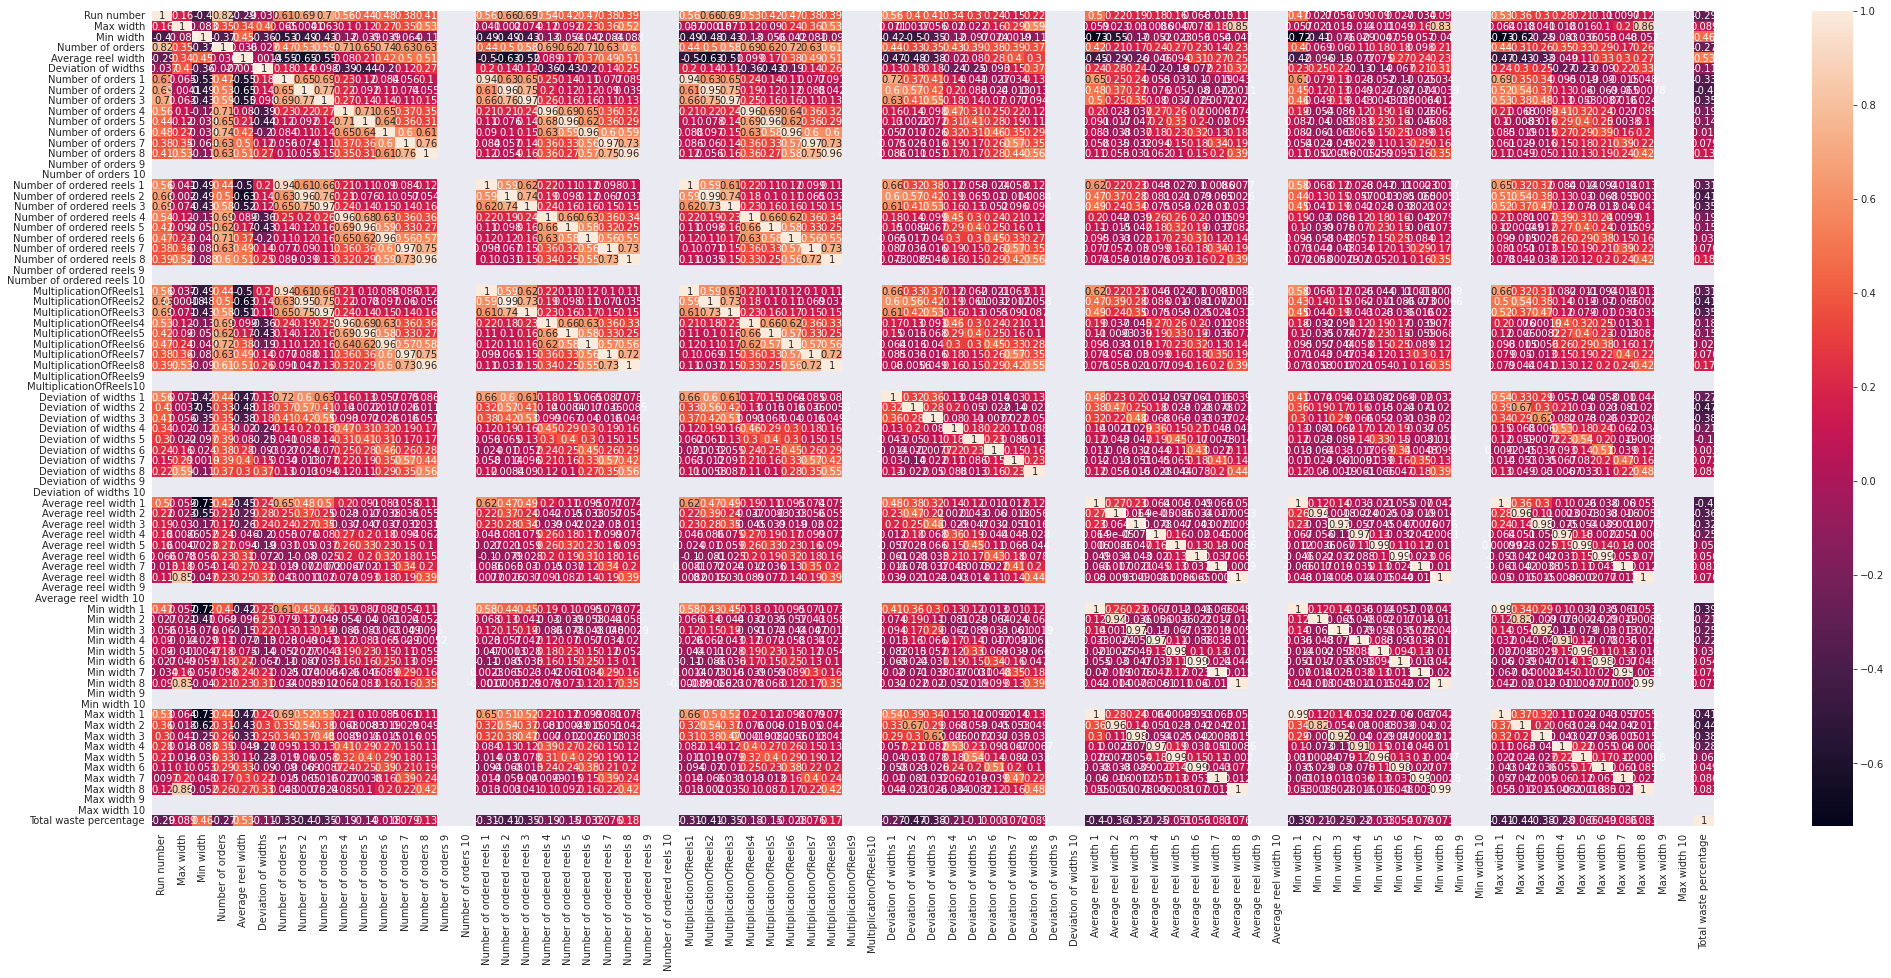

In [128]:
plot_corr_matrix(extended_runs)

In [129]:
X = extended_runs.fillna(0).drop(columns=['Total waste percentage'])
y = extended_runs['Total waste percentage']

In [130]:
X

Run number  Max width  Min width  ...  Max width 8  Max width 9  Max width 10
0           701       4300        500  ...          0.0          0.0           0.0
1           702       4900        800  ...       4900.0          0.0           0.0
2           703       4600        500  ...       4600.0          0.0           0.0
3           704       4900        500  ...       4900.0          0.0           0.0
4           705       5000        600  ...       5000.0          0.0           0.0
..          ...        ...        ...  ...          ...          ...           ...
345        1046       4900        600  ...       4900.0          0.0           0.0
346        1047       5000        500  ...       5000.0          0.0           0.0
347        1048       5000        500  ...       5000.0          0.0           0.0
348        1049       5000        500  ...       5000.0          0.0           0.0
349        1050       4900        500  ...       4900.0          0.0           0.0

[350 rows x 76 columns]

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [132]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[08:19:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [133]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000159
5             DecisionTreeRegressor  ...             0.000024
6                    XGBRFRegressor  ...             0.000029
0                 Linear regression  ...             0.000048
2                        ElasticNet  ...             0.000045
3                     BayesianRidge  ...             0.000040
7  Polynomial regression 2nd degree  ...             0.000009
8  Polynomial regression 3nd degree  ...             0.000194
1                     SGD regressor  ...             0.000040

[9 rows x 5 columns]

## Results with stratified K fold validation

In [134]:
results = test_regression_models_with_K_Fold_Validation(X, y)

In [135]:
results

Model name  Mean absolute error
4             RandomForestRegressor         8.934944e-01
6                    XGBRFRegressor         9.559636e-01
3                     BayesianRidge         1.228226e+00
5             DecisionTreeRegressor         1.233125e+00
2                        ElasticNet         1.271848e+00
0                 Linear regression         1.319800e+00
7  Polynomial regression 2nd degree         5.011845e+00
8  Polynomial regression 3nd degree         1.941463e+01
1                     SGD regressor         8.471571e+20

## Pass input from MinMaxScaler

In [136]:
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)

In [137]:
results = test_regression_models_with_K_Fold_Validation(x_scaled, y)

In [138]:
results

Model name  Mean absolute error
4             RandomForestRegressor             0.890784
6                    XGBRFRegressor             0.955290
3                     BayesianRidge             1.210140
5             DecisionTreeRegressor             1.232998
1                     SGD regressor             1.273775
0                 Linear regression             1.319800
8  Polynomial regression 3nd degree             1.535018
2                        ElasticNet             1.610526
7  Polynomial regression 2nd degree             1.833544

In [139]:
X.columns

Index(['Run number', 'Max width', 'Min width', 'Number of orders',
       'Average reel width', 'Deviation of widths', 'Number of orders 1',
       'Number of orders 2', 'Number of orders 3', 'Number of orders 4',
       'Number of orders 5', 'Number of orders 6', 'Number of orders 7',
       'Number of orders 8', 'Number of orders 9', 'Number of orders 10',
       'Number of ordered reels 1', 'Number of ordered reels 2',
       'Number of ordered reels 3', 'Number of ordered reels 4',
       'Number of ordered reels 5', 'Number of ordered reels 6',
       'Number of ordered reels 7', 'Number of ordered reels 8',
       'Number of ordered reels 9', 'Number of ordered reels 10',
       'MultiplicationOfReels1', 'MultiplicationOfReels2',
       'MultiplicationOfReels3', 'MultiplicationOfReels4',
       'MultiplicationOfReels5', 'MultiplicationOfReels6',
       'MultiplicationOfReels7', 'MultiplicationOfReels8',
       'MultiplicationOfReels9', 'MultiplicationOfReels10',
       'Deviation

## Pass input from StandardScaler

In [140]:
standardScaler = preprocessing.StandardScaler()
x_standarized = standardScaler.fit_transform(X)

In [141]:
x_standarized = pd.DataFrame(x_standarized, columns=['Run number', 'Max width', 'Min width', 'Number of orders',
       'Average reel width', 'Deviation of widths', 'Number of orders 1',
       'Number of orders 2', 'Number of orders 3', 'Number of orders 4',
       'Number of orders 5', 'Number of orders 6', 'Number of orders 7',
       'Number of orders 8', 'Number of orders 9', 'Number of orders 10',
       'Number of ordered reels 1', 'Number of ordered reels 2',
       'Number of ordered reels 3', 'Number of ordered reels 4',
       'Number of ordered reels 5', 'Number of ordered reels 6',
       'Number of ordered reels 7', 'Number of ordered reels 8',
       'Number of ordered reels 9', 'Number of ordered reels 10',
       'MultiplicationOfReels1', 'MultiplicationOfReels2',
       'MultiplicationOfReels3', 'MultiplicationOfReels4',
       'MultiplicationOfReels5', 'MultiplicationOfReels6',
       'MultiplicationOfReels7', 'MultiplicationOfReels8',
       'MultiplicationOfReels9', 'MultiplicationOfReels10',
       'Deviation of widths 1', 'Deviation of widths 2',
       'Deviation of widths 3', 'Deviation of widths 4',
       'Deviation of widths 5', 'Deviation of widths 6',
       'Deviation of widths 7', 'Deviation of widths 8',
       'Deviation of widths 9', 'Deviation of widths 10',
       'Average reel width 1', 'Average reel width 2', 'Average reel width 3',
       'Average reel width 4', 'Average reel width 5', 'Average reel width 6',
       'Average reel width 7', 'Average reel width 8', 'Average reel width 9',
       'Average reel width 10', 'Min width 1', 'Min width 2', 'Min width 3',
       'Min width 4', 'Min width 5', 'Min width 6', 'Min width 7',
       'Min width 8', 'Min width 9', 'Min width 10', 'Max width 1',
       'Max width 2', 'Max width 3', 'Max width 4', 'Max width 5',
       'Max width 6', 'Max width 7', 'Max width 8', 'Max width 9',
       'Max width 10'])

In [142]:
results = test_regression_models_with_K_Fold_Validation(x_standarized, y)

In [143]:
results

Model name  Mean absolute error
4             RandomForestRegressor             0.899841
6                    XGBRFRegressor             0.955832
3                     BayesianRidge             1.205619
1                     SGD regressor             1.220860
5             DecisionTreeRegressor             1.221936
2                        ElasticNet             1.260591
8  Polynomial regression 3nd degree             1.314003
0                 Linear regression             1.319800
7  Polynomial regression 2nd degree             1.777511

## Model tuning

### Bayesian ridge regressor tuning

In [144]:
random_grid = {"n_iter": np.arange(100, 10000, 100),
                      "alpha_1": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "alpha_2": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "lambda_1": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "lambda_2": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "fit_intercept" : [True, False],
                      "normalize": [True, False]
                      }
br = BayesianRidge()
br_random = RandomizedSearchCV(estimator = br, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
br_random.fit(x_standarized, y)
br_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha_1': 0.1,
 'alpha_2': 1e-05,
 'fit_intercept': True,
 'lambda_1': 1e-05,
 'lambda_2': 0.1,
 'n_iter': 6100,
 'normalize': False}

In [146]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
br = BayesianRidge(alpha_1 = 0.1, alpha_2 = 1e-05, lambda_1 = 1e-05, lambda_2 = 0.1, n_iter = 6100)
'MAE :%.3f' % (-1*(mean(cross_val_score(br, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'MAE :1.203'

In [147]:
feature_importance = calculate_feature_importance(BayesianRidge(alpha_1 = 0.1, alpha_2 = 1e-05, lambda_1 = 1e-05, lambda_2 = 0.1, n_iter = 6100), x_standarized, y, True)

In [148]:
feature_importance

Column name   weights
4          Average reel width  0.580322
33     MultiplicationOfReels8  0.216333
23  Number of ordered reels 8  0.215052
2                   Min width  0.177607
6          Number of orders 1  0.142657
..                        ...       ...
30     MultiplicationOfReels5 -0.158150
58                Min width 3 -0.166224
38      Deviation of widths 3 -0.182546
37      Deviation of widths 2 -0.266781
5         Deviation of widths -0.406882

[76 rows x 2 columns]

### Random forest regressor tuning

In [149]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [150]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [151]:
# Fit the random search model
rf_random.fit(x_standarized, y)
# Fit the random search model
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 600}

In [152]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(max_depth =40, min_samples_leaf= 4, min_samples_split = 2 ,n_estimators= 600)
'MAE :%.3f' % (-1*(mean(cross_val_score(rf, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'MAE :0.865'

In [153]:
feature_importance = calculate_feature_importance(RandomForestRegressor(max_depth =40, min_samples_leaf= 4, min_samples_split = 2 ,n_estimators= 600), x_standarized, y)

In [154]:
feature_importance

Column name  feature importance
4          Average reel width            0.443984
27     MultiplicationOfReels2            0.085856
18  Number of ordered reels 3            0.075164
17  Number of ordered reels 2            0.074117
28     MultiplicationOfReels3            0.049762
..                        ...                 ...
15        Number of orders 10            0.000000
35    MultiplicationOfReels10            0.000000
34     MultiplicationOfReels9            0.000000
24  Number of ordered reels 9            0.000000
75               Max width 10            0.000000

[76 rows x 2 columns]

### Decision tree regressor tuning

In [155]:
criterion = ['squared_error', 'friedman_mse', "absolute_error", "poisson"]
splitter = ['best', 'random']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

random_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}

In [156]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dtr = DecisionTreeRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dtr_random = RandomizedSearchCV(estimator = dtr, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
dtr_random.fit(x_standarized, y)
dtr_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'criterion': 'squared_error',
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'best'}

In [157]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
dtr = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 60, max_features= 'auto', min_samples_leaf=4, min_samples_split=12, splitter= 'best')
'DecisionTreeClassifier after tuning MAE :%.3f' % (-1*(mean(cross_val_score(dtr, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'DecisionTreeClassifier after tuning MAE :1.081'

In [158]:
feature_importance = calculate_feature_importance(DecisionTreeRegressor(criterion = 'squared_error', max_depth = 60, max_features= 'auto', min_samples_leaf=4, min_samples_split=12, splitter= 'best'), x_standarized, y)

In [159]:
feature_importance

Column name  feature importance
4          Average reel width            0.461458
28     MultiplicationOfReels3            0.167645
27     MultiplicationOfReels2            0.094745
48       Average reel width 3            0.084268
69                Max width 4            0.036473
..                        ...                 ...
20  Number of ordered reels 5            0.000000
24  Number of ordered reels 9            0.000000
49       Average reel width 4            0.000000
11         Number of orders 6            0.000000
75               Max width 10            0.000000

[76 rows x 2 columns]

### Elastic net regressor tuning

In [160]:
random_grid = {"max_iter": [1, 5, 10, 100, 1000],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1),
                      "selection": ["cyclic", "random"]}
en = ElasticNet()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
en_random = RandomizedSearchCV(estimator = en, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
en_random.fit(x_standarized, y)
en_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha': 10, 'l1_ratio': 0.0, 'max_iter': 1, 'selection': 'cyclic'}

In [161]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
'ElasticNet after tuning MAE :%.3f' % (-1*(mean(cross_val_score(ElasticNet(alpha=10, l1_ratio=0.0, max_iter = 1, selection= 'cyclic'), x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'ElasticNet after tuning MAE :1.194'

In [162]:
feature_importance = calculate_feature_importance(ElasticNet(alpha=10, l1_ratio=0.0, max_iter = 1, selection= 'cyclic'), x_standarized, y, True)

In [163]:
feature_importance

Column name   weights
4          Average reel width  0.097015
2                   Min width  0.088641
23  Number of ordered reels 8  0.031467
33     MultiplicationOfReels8  0.028584
12         Number of orders 7  0.027578
..                        ...       ...
17  Number of ordered reels 2 -0.057924
48       Average reel width 3 -0.060482
37      Deviation of widths 2 -0.064855
0                  Run number -0.065697
7          Number of orders 2 -0.067326

[76 rows x 2 columns]

### SGD regressor tuning

In [164]:
penalty = ['l2', 'l1', 'elasticnet']
alpha = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
l1_ratio = np.arange(0.05, 1.0, 0.05)
max_iter = np.arange(100, 10000, 100)
tolerance = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
epsilon = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
learning_rate =  ['invscaling', 'constant', 'optimal', 'adaptive']

random_grid = {'penalty':penalty,
               'alpha': alpha,
               'l1_ratio': l1_ratio,
               'max_iter': max_iter,
               'tol': tolerance,
               'epsilon': epsilon,
               'learning_rate': learning_rate}
sgd = SGDRegressor()
sgd_random = RandomizedSearchCV(estimator = sgd, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
sgd_random.fit(x_standarized, y)
sgd_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha': 0.1,
 'epsilon': 1e-06,
 'l1_ratio': 0.2,
 'learning_rate': 'constant',
 'max_iter': 3500,
 'penalty': 'elasticnet',
 'tol': 1e-07}

In [165]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
'SGD after tuning MAE :%.3f' % (-1*(mean(cross_val_score(SGDRegressor(alpha=0.1, l1_ratio=0.2, epsilon=1e-06, learning_rate='constant', max_iter = 3500, penalty= 'elasticnet', tol=1e-07), x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'SGD after tuning MAE :1.365'

In [166]:
feature_importance = calculate_feature_importance(SGDRegressor(alpha=0.1, l1_ratio=0.2, epsilon=1e-06, learning_rate='constant', max_iter = 3500, penalty= 'elasticnet', tol=1e-07), x_standarized, y, True)

In [167]:
feature_importance

Column name   weights
4          Average reel width  0.720504
33     MultiplicationOfReels8  0.255704
23  Number of ordered reels 8  0.247447
2                   Min width  0.243261
7          Number of orders 2  0.215246
..                        ...       ...
58                Min width 3 -0.138910
56                Min width 1 -0.149178
67                Max width 2 -0.172449
37      Deviation of widths 2 -0.268267
5         Deviation of widths -0.571041

[76 rows x 2 columns]

## Deep learning experiments


We will continue experiments by using deep learning

In [192]:
x_standarized

Run number  Max width  Min width  ...  Max width 8  Max width 9  Max width 10
0     -1.727109  -1.631499  -0.613672  ...    -2.471129          0.0           0.0
1     -1.717212   0.395807   0.379172  ...     0.412836          0.0           0.0
2     -1.707314  -0.617846  -0.613672  ...     0.236267          0.0           0.0
3     -1.697417   0.395807  -0.613672  ...     0.412836          0.0           0.0
4     -1.687519   0.733692  -0.282724  ...     0.471692          0.0           0.0
..          ...        ...        ...  ...          ...          ...           ...
345    1.687519   0.395807  -0.282724  ...     0.412836          0.0           0.0
346    1.697417   0.733692  -0.613672  ...     0.471692          0.0           0.0
347    1.707314   0.733692  -0.613672  ...     0.471692          0.0           0.0
348    1.717212   0.733692  -0.613672  ...     0.471692          0.0           0.0
349    1.727109   0.395807  -0.613672  ...     0.412836          0.0           0.0

[350 rows x 76 columns]

In [190]:
epochs = 4000
batch_size = 2

In [193]:
X_train, X_test, y_train, y_test = train_test_split(x_standarized, y, test_size=0.20, random_state = 0)

### Single dense model experiments

In [196]:
model = seq()
model.add(Dense(35, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [197]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 23.
Epoch 00033: early stopping


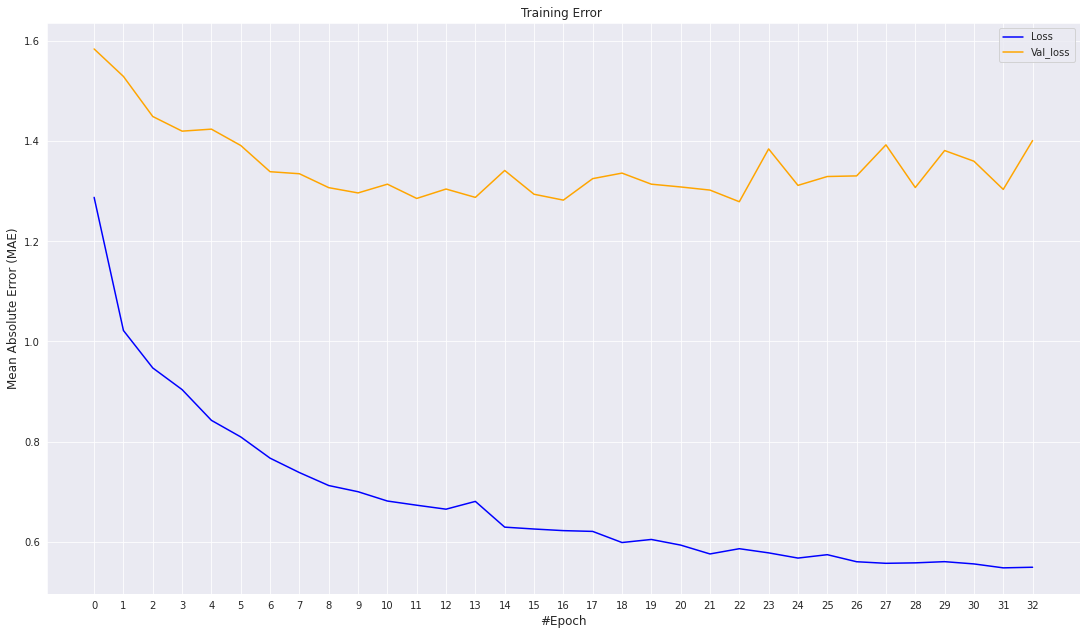

In [198]:
plot_loss_and_val_loss(hist)

In [199]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 1.4013845920562744'

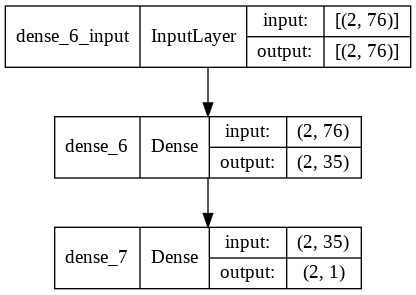

In [200]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [201]:
model = seq()
model.add(Dense(35, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [202]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 7.
Epoch 00017: early stopping


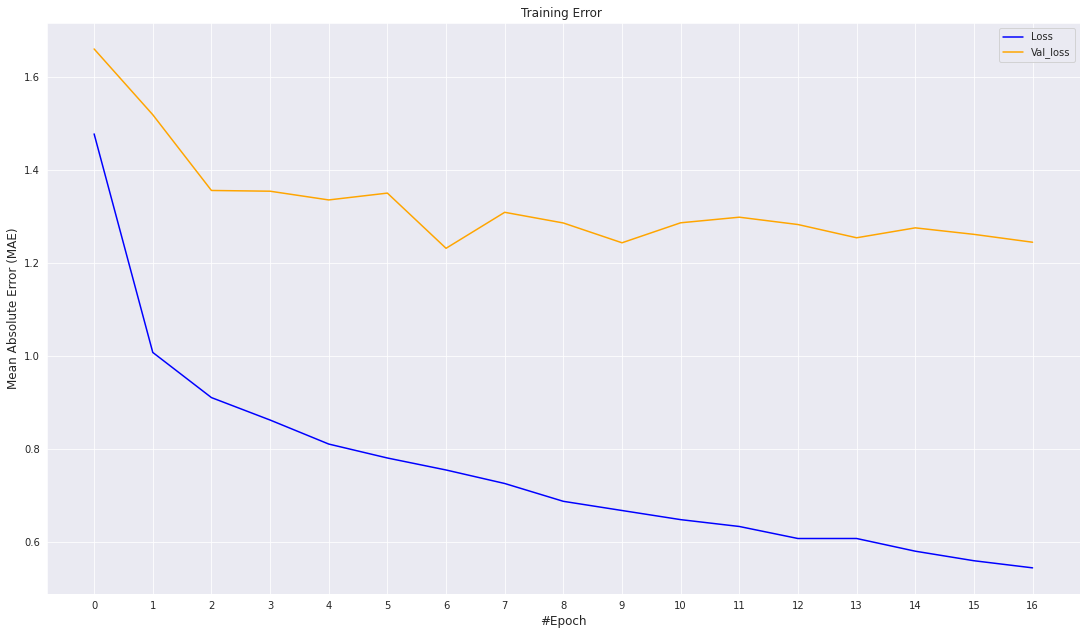

In [203]:
plot_loss_and_val_loss(hist)

In [204]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 1.243909478187561'

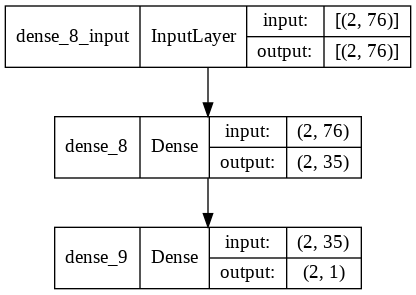

In [205]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Two denses model experiments

In [206]:
model = seq()
model.add(Dense(35, activation = 'relu'))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [207]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 15.
Epoch 00025: early stopping


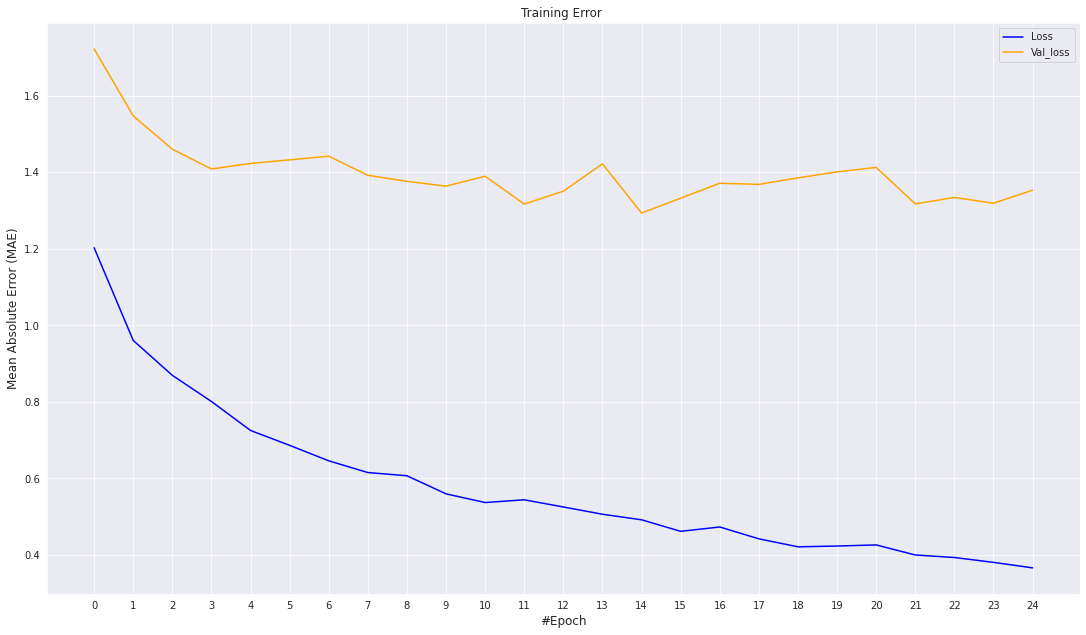

In [208]:
plot_loss_and_val_loss(hist)

In [209]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 1.352885127067566'

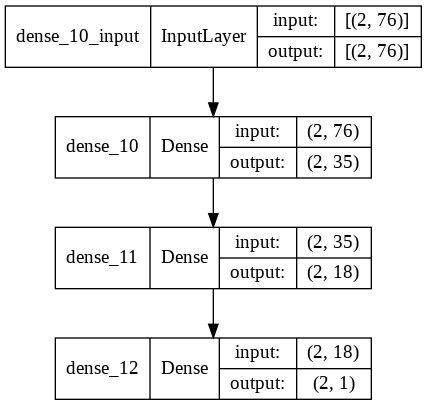

In [210]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [211]:
model = seq()
model.add(Dense(35, activation = 'relu'))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [212]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 17.
Epoch 00027: early stopping


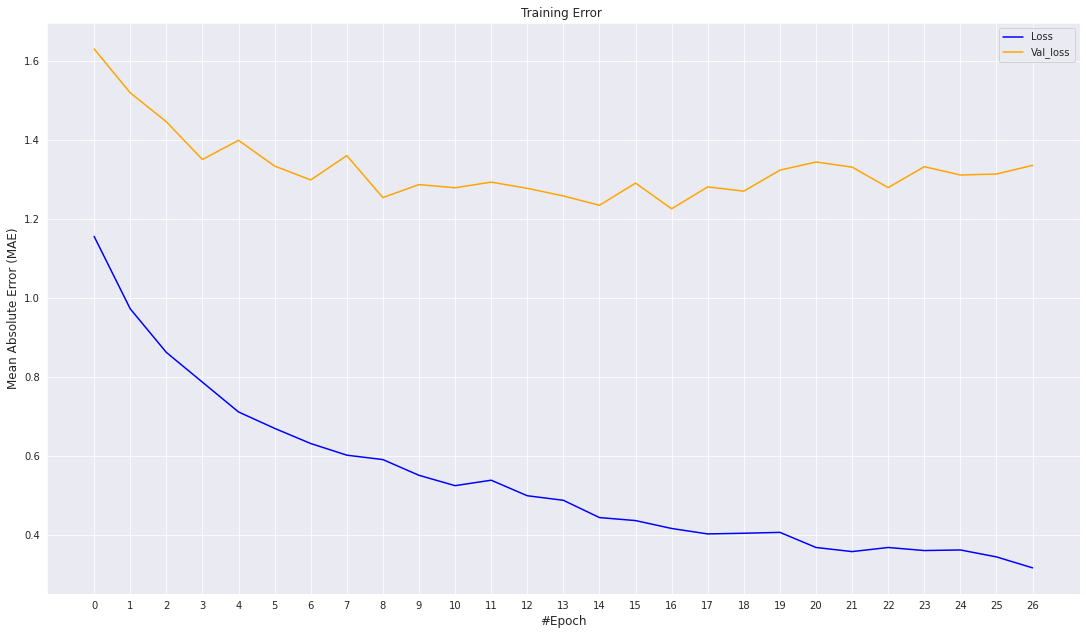

In [213]:
plot_loss_and_val_loss(hist)

In [214]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 1.3348668813705444'

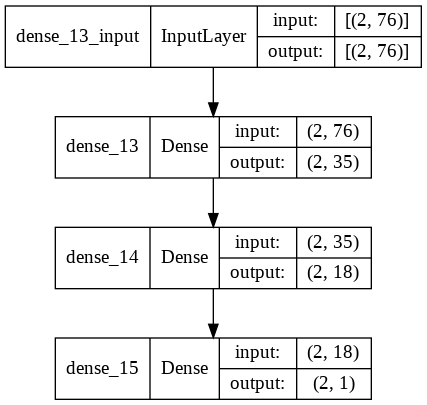

In [215]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Three denses model experiments

In [216]:
model = seq()
model.add(Dense(35, activation = 'relu'))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [217]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 16.
Epoch 00026: early stopping


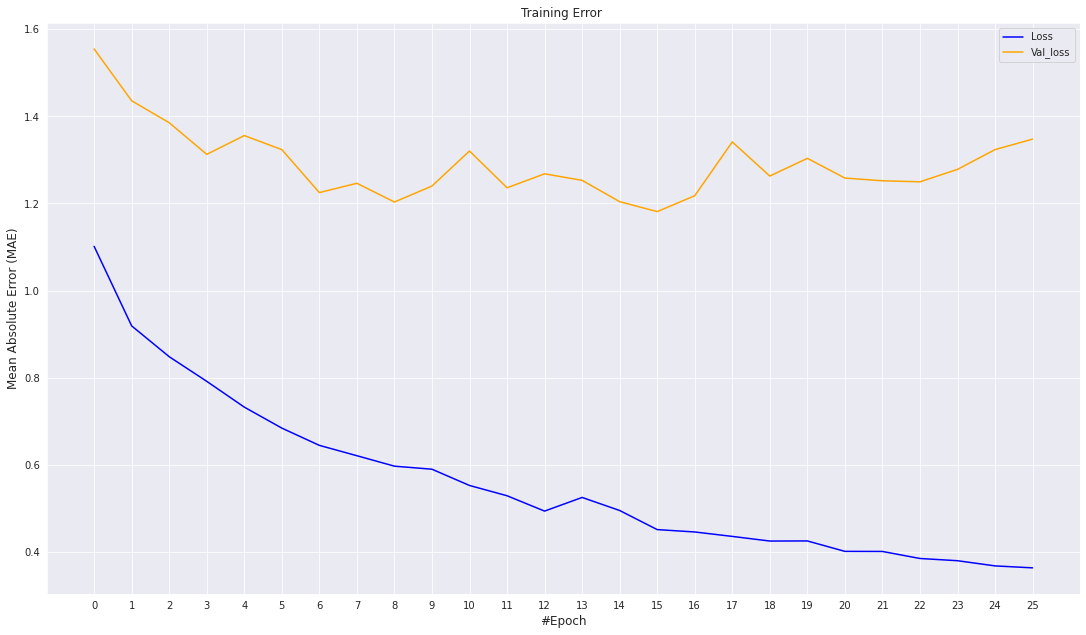

In [218]:
plot_loss_and_val_loss(hist)

In [219]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 1.3476951122283936'

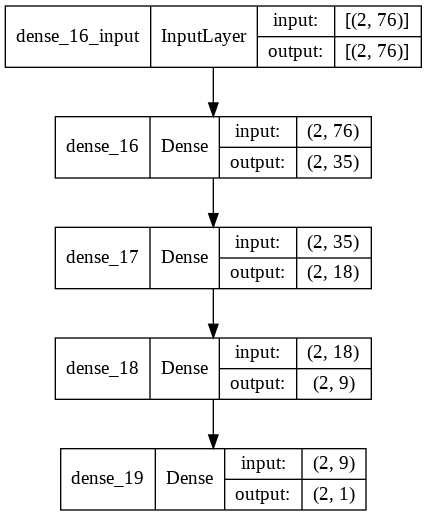

In [220]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [221]:
model = seq()
model.add(Dense(35, activation = 'relu'))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [222]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 16.
Epoch 00026: early stopping


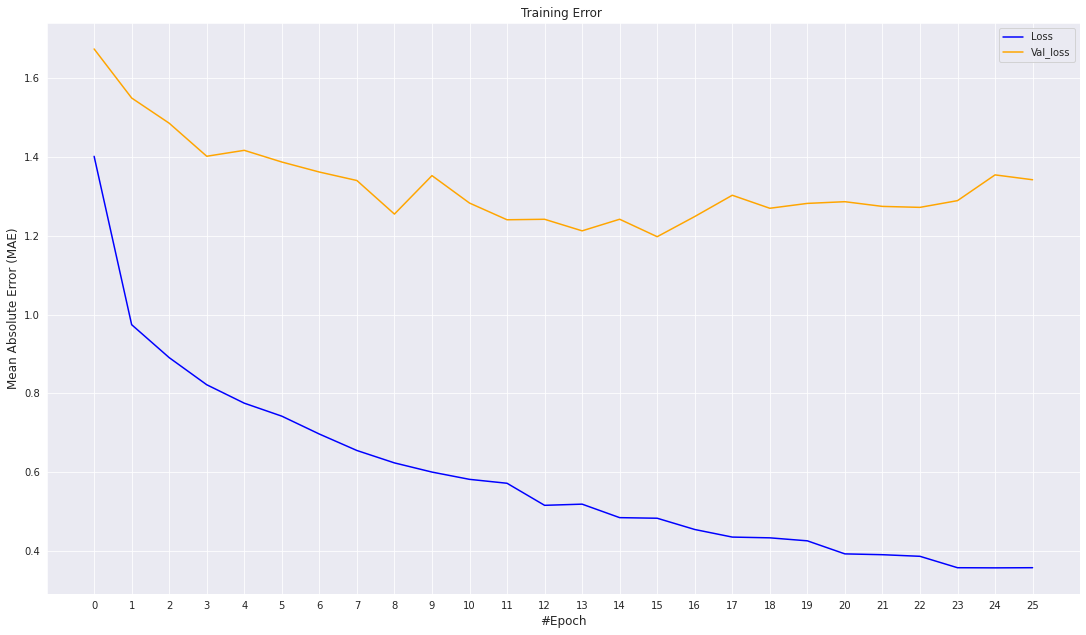

In [223]:
plot_loss_and_val_loss(hist)

In [224]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 1.34233558177948'

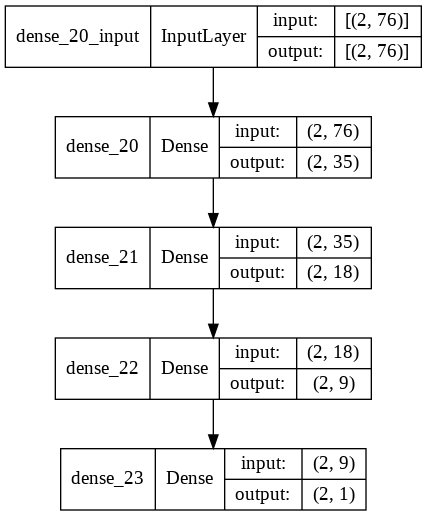

In [225]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Four denses model experiments

In [226]:
model = seq()
model.add(Dense(35, activation = 'relu'))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [227]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 15.
Epoch 00025: early stopping


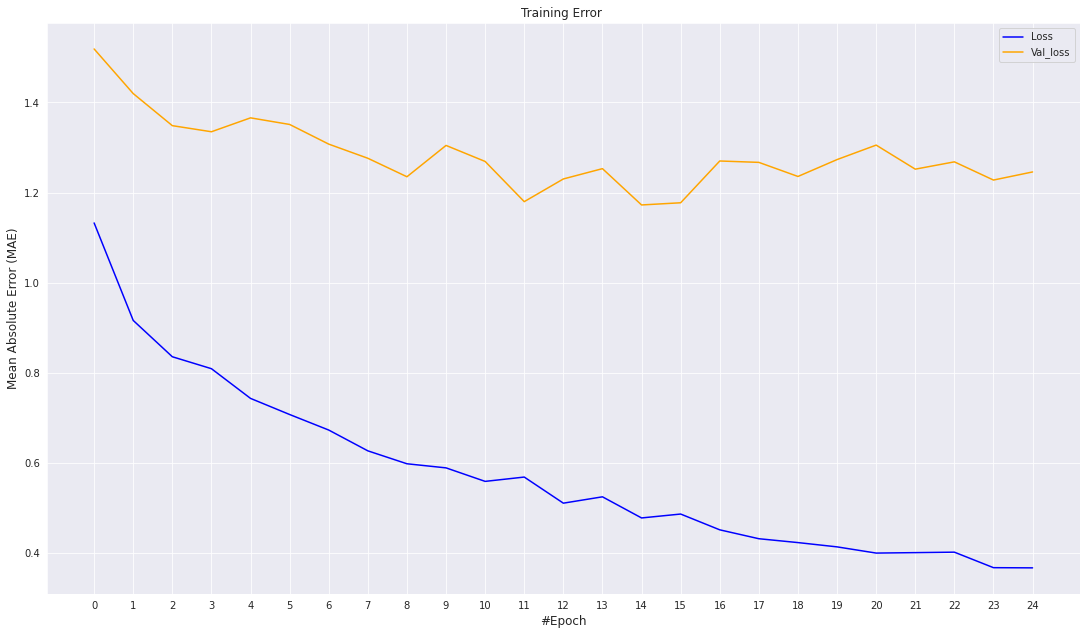

In [228]:
plot_loss_and_val_loss(hist)

In [229]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 1.2458343505859375'

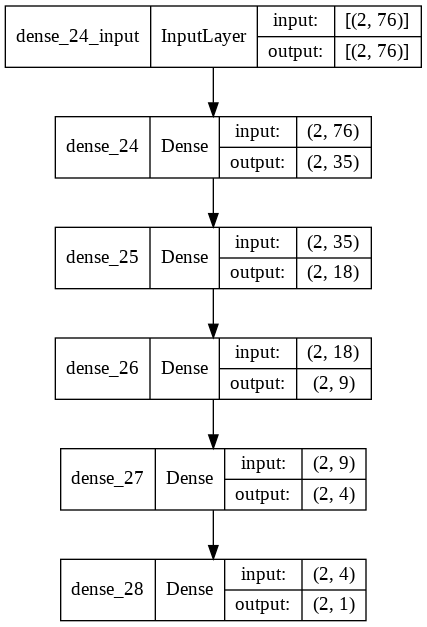

In [230]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [231]:
model = seq()
model.add(Dense(35, activation = 'relu'))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [232]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 12.
Epoch 00022: early stopping


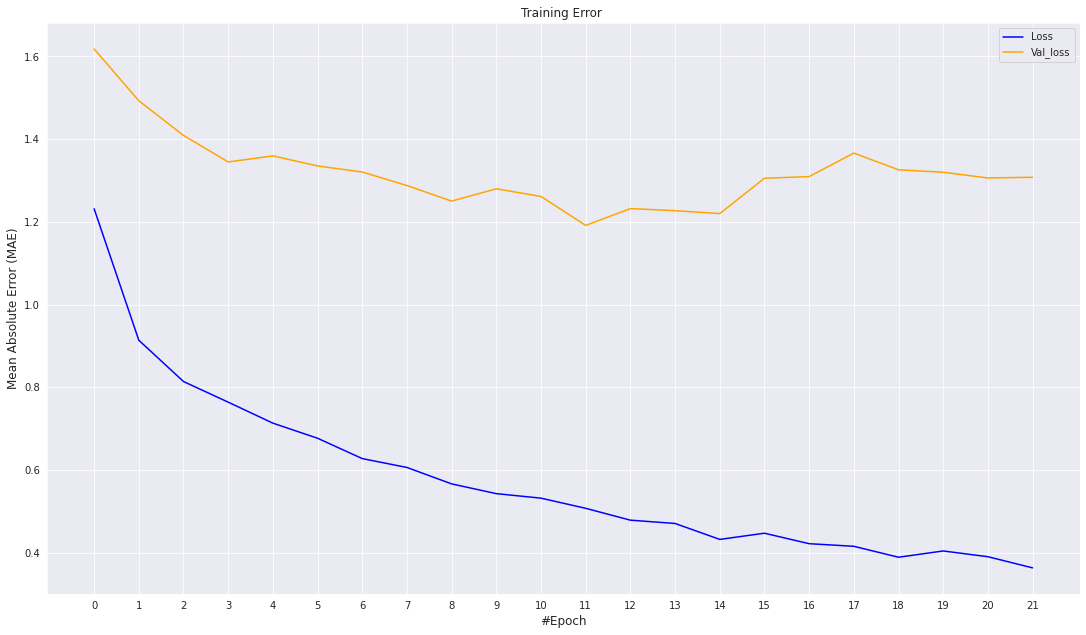

In [233]:
plot_loss_and_val_loss(hist)

In [234]:
"Validation MAE loss = " + str(hist.history['val_loss'][-1])

'Validation MAE loss = 1.307638168334961'

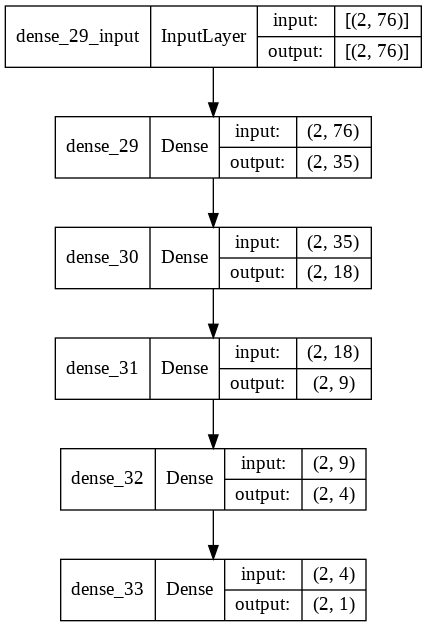

In [235]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Exploratory regression experiments with extended dataset after feature extraction using PCA


In [236]:
X = extended_runs.drop(columns=['Total waste percentage'])
y = extended_runs['Total waste percentage']

In [237]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
x_principalComponents = pca.fit_transform(X)

In [238]:
x_principalComponents

array([[-7.90502775e+05,  1.67539754e+05,  1.94352047e+03,
        -8.19153358e+04,  1.01510174e+05, -2.20402509e+04],
       [-5.04987691e+05,  1.58863157e+05,  7.75764968e+04,
        -7.59165695e+04,  1.40827558e+04,  2.28558861e+05],
       [-5.10166025e+05,  1.81654037e+05, -2.84133190e+05,
        -4.13006884e+04, -2.87308726e+04,  9.06091470e+04],
       ...,
       [ 2.07570798e+06,  5.47145286e+05,  1.20492811e+05,
         4.34967462e+05,  2.72115382e+04,  1.78920178e+05],
       [ 6.37764021e+05, -2.29848425e+05,  1.56259879e+05,
        -1.11217073e+04,  3.13371168e+05,  1.60008350e+05],
       [ 4.52074105e+05,  2.65562610e+05, -2.70639194e+05,
         1.45902569e+05, -1.11075864e+05,  4.33172305e+04]])

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [240]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[09:02:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [241]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000147
6                    XGBRFRegressor  ...             0.000030
5             DecisionTreeRegressor  ...             0.000021
0                 Linear regression  ...             0.000045
2                        ElasticNet  ...             0.000039
3                     BayesianRidge  ...             0.000034
7  Polynomial regression 2nd degree  ...             0.000031
8  Polynomial regression 3nd degree  ...             0.000108
1                     SGD regressor  ...             0.000034

[9 rows x 5 columns]

### Pass input from MinMaxScaler

In [242]:
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)

In [243]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state = 0)

In [244]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[09:02:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [245]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000127
6                    XGBRFRegressor  ...             0.000008
5             DecisionTreeRegressor  ...             0.000002
0                 Linear regression  ...             0.000003
3                     BayesianRidge  ...             0.000003
1                     SGD regressor  ...             0.000003
8  Polynomial regression 3nd degree  ...             0.000119
7  Polynomial regression 2nd degree  ...             0.000067
2                        ElasticNet  ...             0.000003

[9 rows x 5 columns]

### Pass input from StandardScaler

In [246]:
standardScaler = preprocessing.StandardScaler()
x_standarized = standardScaler.fit_transform(X)

In [247]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state = 0)

In [248]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[09:03:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [249]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000156
6                    XGBRFRegressor  ...             0.000012
5             DecisionTreeRegressor  ...             0.000002
0                 Linear regression  ...             0.000003
3                     BayesianRidge  ...             0.000003
1                     SGD regressor  ...             0.000003
8  Polynomial regression 3nd degree  ...             0.000132
7  Polynomial regression 2nd degree  ...             0.000011
2                        ElasticNet  ...             0.000003

[9 rows x 5 columns]

## Results with stratified K fold validation

In [250]:
results = test_regression_models_with_K_Fold_Validation(x_standarized, y)

In [251]:
results

Model name  Mean absolute error
4             RandomForestRegressor             0.893413
6                    XGBRFRegressor             0.955832
3                     BayesianRidge             1.205619
5             DecisionTreeRegressor             1.210166
1                     SGD regressor             1.222173
2                        ElasticNet             1.260591
8  Polynomial regression 3nd degree             1.314003
0                 Linear regression             1.319800
7  Polynomial regression 2nd degree             1.777511

## Model tuning

### Bayesian ridge regressor tuning

In [252]:
random_grid = {"n_iter": np.arange(100, 10000, 100),
                      "alpha_1": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "alpha_2": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "lambda_1": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "lambda_2": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "fit_intercept" : [True, False],
                      "normalize": [True, False]
                      }
br = BayesianRidge()
br_random = RandomizedSearchCV(estimator = br, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
br_random.fit(x_standarized, y)
br_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha_1': 0.1,
 'alpha_2': 1e-05,
 'fit_intercept': True,
 'lambda_1': 1e-05,
 'lambda_2': 0.1,
 'n_iter': 6100,
 'normalize': False}

In [253]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
br = BayesianRidge(alpha_1 = 0.1, alpha_2 = 1e-05, lambda_1 = 1e-05, lambda_2 = 0.1, n_iter = 6100, fit_intercept=True, normalize=False)
'MAE :%.3f' % (-1*(mean(cross_val_score(br, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'MAE :1.203'

### Random forest regressor tuning

In [254]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_standarized, y)
# Fit the random search model
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [255]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(max_depth =70, min_samples_leaf= 2, min_samples_split = 2 ,n_estimators= 1400, max_features='auto')
'MAE :%.3f' % (-1*(mean(cross_val_score(rf, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'MAE :0.878'

### Decision tree regressor tuning

In [256]:
criterion = ['squared_error', 'friedman_mse', "absolute_error", "poisson"]
splitter = ['best', 'random']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

random_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}

In [257]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dtr = DecisionTreeRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dtr_random = RandomizedSearchCV(estimator = dtr, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
dtr_random.fit(x_standarized, y)
dtr_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'criterion': 'squared_error',
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'best'}

In [258]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
dtr = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 60, max_features= 'auto', min_samples_leaf=4, min_samples_split=2, splitter= 'best')
'DecisionTreeClassifier after tuning MAE :%.3f' % (-1*(mean(cross_val_score(dtr, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'DecisionTreeClassifier after tuning MAE :1.121'

### Elastic net regressor tuning

In [259]:
random_grid = {"max_iter": [1, 5, 10, 100, 1000],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1),
                      "selection": ["cyclic", "random"]}
en = ElasticNet()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
en_random = RandomizedSearchCV(estimator = en, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
en_random.fit(x_standarized, y)
en_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha': 10, 'l1_ratio': 0.0, 'max_iter': 1, 'selection': 'cyclic'}

In [260]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
'ElasticNet after tuning MAE :%.3f' % (-1*(mean(cross_val_score(ElasticNet(alpha=10, l1_ratio=0.0, max_iter = 1, selection= 'cyclic'), x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'ElasticNet after tuning MAE :1.301'

### SGD regressor tuning

In [261]:
penalty = ['l2', 'l1', 'elasticnet']
alpha = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
l1_ratio = np.arange(0.05, 1.0, 0.05)
max_iter = np.arange(100, 10000, 100)
tolerance = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
epsilon = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
learning_rate =  ['invscaling', 'constant', 'optimal', 'adaptive']

random_grid = {'penalty':penalty,
               'alpha': alpha,
               'l1_ratio': l1_ratio,
               'max_iter': max_iter,
               'tol': tolerance,
               'epsilon': epsilon,
               'learning_rate': learning_rate}
sgd = SGDRegressor()
sgd_random = RandomizedSearchCV(estimator = sgd, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
sgd_random.fit(x_standarized, y)
sgd_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha': 0.1,
 'epsilon': 0.01,
 'l1_ratio': 0.25,
 'learning_rate': 'constant',
 'max_iter': 1300,
 'penalty': 'elasticnet',
 'tol': 1e-06}

In [262]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
'SGD after tuning MAE :%.3f' % (-1*(mean(cross_val_score(SGDRegressor(alpha=0.1, l1_ratio=0.6, epsilon=0.001, learning_rate='invscaling', max_iter = 4800, penalty= 'l1', tol=1e-07), x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'SGD after tuning MAE :1.250'

# Generalization tests

In [269]:
X_train = runs.loc[runs['Run number'] <= 950]
x_test = runs.loc[runs['Run number'] > 950]

In [272]:
# Splitting into features and value to be predicted
X_train_g = X_train.drop(columns=['Run number', 'Total waste percentage', 'Class'])
y_train_g = X_train['Total waste percentage']

In [273]:
# Splitting into features and value to be predicted
x_test_g = x_test.drop(columns=['Run number', 'Total waste percentage', 'Class'])
y_test_g = x_test['Total waste percentage']

In [285]:
results = test_regression_models(X_train_g, x_test_g, y_train_g, y_test_g)

[09:50:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [286]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000186
6                    XGBRFRegressor  ...             0.000013
5             DecisionTreeRegressor  ...             0.000020
3                     BayesianRidge  ...             0.000018
2                        ElasticNet  ...             0.000018
0                 Linear regression  ...             0.000030
7  Polynomial regression 2nd degree  ...             0.000002
8  Polynomial regression 3nd degree  ...             0.000005
1                     SGD regressor  ...             0.000018

[9 rows x 5 columns]

In [288]:
X_train = extended_runs.loc[runs['Run number'] <= 950]
x_test = extended_runs.loc[runs['Run number'] > 950]

In [290]:
# Splitting into features and value to be predicted
X_train_g = X_train.drop(columns=['Run number', 'Total waste percentage'])
y_train_g = X_train['Total waste percentage']

In [291]:
# Splitting into features and value to be predicted
x_test_g = x_test.drop(columns=['Run number', 'Total waste percentage'])
y_test_g = x_test['Total waste percentage']

In [292]:
results = test_regression_models(X_train_g, x_test_g, y_train_g, y_test_g)

[09:51:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [293]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000216
6                    XGBRFRegressor  ...             0.000033
3                     BayesianRidge  ...             0.000023
5             DecisionTreeRegressor  ...             0.000027
2                        ElasticNet  ...             0.000025
0                 Linear regression  ...             0.000026
7  Polynomial regression 2nd degree  ...             0.000034
8  Polynomial regression 3nd degree  ...             0.000299
1                     SGD regressor  ...             0.000026

[9 rows x 5 columns]